<a href="https://colab.research.google.com/github/dhia-eddine-jedidi/Deep-Learning-Project-using-Autoencoder-CNN-LSTM/blob/main/AutoencoderV2ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stefanogiannini/crema-d-video")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'crema-d-video' dataset.
Path to dataset files: /kaggle/input/crema-d-video


In [2]:
import os
import shutil
import random
from tqdm import tqdm

# =========================================
# CONFIGURATION
# =========================================
source_dir = "/kaggle/input/crema-d-video"      # Folder with all .mp4 files
output_dir = "CREMA-D-Sorted1"         # Target folder
keep_ratio = 0.10                      # 10%

# Emotion mapping
emotion_map = {
    "ANG": "Anger",
    "DIS": "Disgust",
    "FEA": "Fear",
    "HAP": "Happy",
    "NEU": "Neutral",
    "SAD": "Sad"
}

# =========================================
# CREATE TARGET FOLDERS
# =========================================
for emotion_name in emotion_map.values():
    os.makedirs(os.path.join(output_dir, emotion_name), exist_ok=True)

# =========================================
# GROUP FILES BY EMOTION
# =========================================
emotion_files = {emotion: [] for emotion in emotion_map.values()}

for filename in os.listdir(source_dir):
    if filename.endswith(".flv"):
        parts = filename.replace(".flv", "").split("_")
        if len(parts) == 4:
            emotion_code = parts[2]
            emotion_full = emotion_map.get(emotion_code)
            if emotion_full:
                emotion_files[emotion_full].append(filename)
        else:
            print(f"⚠️ Skipping malformed filename: {filename}")

# =========================================
# COPY ONLY 10% OF EACH CLASS
# =========================================
for emotion, files in emotion_files.items():
    if not files:
        continue

    n_keep = max(1, int(len(files) * keep_ratio))  # at least 1 file
    selected = random.sample(files, n_keep)

    print(f"📂 {emotion}: keeping {n_keep} of {len(files)} files ({keep_ratio*100:.0f}%)")

    for filename in tqdm(selected, desc=f"Copying {emotion}"):
        src = os.path.join(source_dir, filename)
        dst = os.path.join(output_dir, emotion, filename)
        shutil.copy2(src, dst)

print("\n✅ Done! Only 10% of each class copied to:", output_dir)


📂 Anger: keeping 127 of 1271 files (10%)


Copying Anger: 100%|██████████| 127/127 [00:01<00:00, 70.63it/s]


📂 Disgust: keeping 127 of 1271 files (10%)


Copying Disgust: 100%|██████████| 127/127 [00:01<00:00, 80.30it/s]


📂 Fear: keeping 127 of 1271 files (10%)


Copying Fear: 100%|██████████| 127/127 [00:01<00:00, 90.83it/s]


📂 Happy: keeping 127 of 1271 files (10%)


Copying Happy: 100%|██████████| 127/127 [00:01<00:00, 89.48it/s]


📂 Neutral: keeping 108 of 1087 files (10%)


Copying Neutral: 100%|██████████| 108/108 [00:01<00:00, 87.21it/s]


📂 Sad: keeping 127 of 1271 files (10%)


Copying Sad: 100%|██████████| 127/127 [00:01<00:00, 90.06it/s]


✅ Done! Only 10% of each class copied to: CREMA-D-Sorted1


In [3]:
!pip install opencv-python


In [4]:
import os
import cv2
from tqdm import tqdm

# Input: sorted emotion folders with videos
videos_root = "/content/CREMA-D-Sorted1"
# Output: matching folder structure for frames
frames_root = "/content/Df_Frames"
os.makedirs(frames_root, exist_ok=True)

for emotion in os.listdir(videos_root):
    emotion_dir = os.path.join(videos_root, emotion)
    if not os.path.isdir(emotion_dir):
        continue

    print(f"\n🎞️ Extracting frames for emotion: {emotion}")
    os.makedirs(os.path.join(frames_root, emotion), exist_ok=True)

    # Process each video file
    for video_file in tqdm(os.listdir(emotion_dir)):
        if not video_file.endswith((".mp4", ".flv")):
            continue

        video_path = os.path.join(emotion_dir, video_file)
        base_name = os.path.splitext(video_file)[0]
        out_dir = os.path.join(frames_root, emotion, base_name)
        os.makedirs(out_dir, exist_ok=True)

        vidcap = cv2.VideoCapture(video_path)
        if not vidcap.isOpened():
            print(f"⚠️ Could not open {video_path}")
            continue

        success, frame = vidcap.read()
        frame_idx = 0
        while success:
            frame_name = f"frame_{frame_idx:04d}.jpg"
            cv2.imwrite(os.path.join(out_dir, frame_name), frame)
            frame_idx += 1
            success, frame = vidcap.read()

        vidcap.release()
        print(f"✅ {video_file}: {frame_idx} frames extracted → {out_dir}")

print("\n✅ All videos processed and frames saved by emotion!")



🎞️ Extracting frames for emotion: Fear


  2%|▏         | 2/127 [00:00<00:23,  5.27it/s]

✅ 1008_ITS_FEA_XX.flv: 95 frames extracted → /content/Df_Frames/Fear/1008_ITS_FEA_XX
✅ 1020_IEO_FEA_LO.flv: 69 frames extracted → /content/Df_Frames/Fear/1020_IEO_FEA_LO


  3%|▎         | 4/127 [00:00<00:19,  6.34it/s]

✅ 1065_IEO_FEA_HI.flv: 56 frames extracted → /content/Df_Frames/Fear/1065_IEO_FEA_HI
✅ 1036_ITS_FEA_XX.flv: 71 frames extracted → /content/Df_Frames/Fear/1036_ITS_FEA_XX


  5%|▍         | 6/127 [00:01<00:20,  6.01it/s]

✅ 1072_TAI_FEA_XX.flv: 111 frames extracted → /content/Df_Frames/Fear/1072_TAI_FEA_XX
✅ 1057_TIE_FEA_XX.flv: 79 frames extracted → /content/Df_Frames/Fear/1057_TIE_FEA_XX


  6%|▌         | 7/127 [00:01<00:19,  6.03it/s]

✅ 1084_IWL_FEA_XX.flv: 99 frames extracted → /content/Df_Frames/Fear/1084_IWL_FEA_XX


  7%|▋         | 9/127 [00:01<00:21,  5.44it/s]

✅ 1008_MTI_FEA_XX.flv: 107 frames extracted → /content/Df_Frames/Fear/1008_MTI_FEA_XX
✅ 1016_IEO_FEA_HI.flv: 75 frames extracted → /content/Df_Frames/Fear/1016_IEO_FEA_HI


  9%|▊         | 11/127 [00:01<00:18,  6.38it/s]

✅ 1056_WSI_FEA_XX.flv: 72 frames extracted → /content/Df_Frames/Fear/1056_WSI_FEA_XX
✅ 1057_ITS_FEA_XX.flv: 75 frames extracted → /content/Df_Frames/Fear/1057_ITS_FEA_XX


 10%|█         | 13/127 [00:02<00:15,  7.44it/s]

✅ 1048_IEO_FEA_MD.flv: 63 frames extracted → /content/Df_Frames/Fear/1048_IEO_FEA_MD
✅ 1083_IEO_FEA_HI.flv: 72 frames extracted → /content/Df_Frames/Fear/1083_IEO_FEA_HI


 12%|█▏        | 15/127 [00:02<00:15,  7.25it/s]

✅ 1036_TIE_FEA_XX.flv: 81 frames extracted → /content/Df_Frames/Fear/1036_TIE_FEA_XX
✅ 1047_ITH_FEA_XX.flv: 85 frames extracted → /content/Df_Frames/Fear/1047_ITH_FEA_XX


 13%|█▎        | 16/127 [00:02<00:16,  6.84it/s]

✅ 1001_IWL_FEA_XX.flv: 71 frames extracted → /content/Df_Frames/Fear/1001_IWL_FEA_XX


 13%|█▎        | 17/127 [00:02<00:20,  5.33it/s]

✅ 1004_WSI_FEA_XX.flv: 78 frames extracted → /content/Df_Frames/Fear/1004_WSI_FEA_XX


 14%|█▍        | 18/127 [00:03<00:22,  4.79it/s]

✅ 1034_IWL_FEA_XX.flv: 77 frames extracted → /content/Df_Frames/Fear/1034_IWL_FEA_XX


 15%|█▍        | 19/127 [00:03<00:31,  3.38it/s]

✅ 1067_TAI_FEA_XX.flv: 83 frames extracted → /content/Df_Frames/Fear/1067_TAI_FEA_XX


 16%|█▌        | 20/127 [00:04<00:39,  2.74it/s]

✅ 1020_DFA_FEA_XX.flv: 65 frames extracted → /content/Df_Frames/Fear/1020_DFA_FEA_XX


 17%|█▋        | 21/127 [00:04<00:44,  2.40it/s]

✅ 1047_TAI_FEA_XX.flv: 70 frames extracted → /content/Df_Frames/Fear/1047_TAI_FEA_XX


 17%|█▋        | 22/127 [00:04<00:40,  2.62it/s]

✅ 1035_IOM_FEA_XX.flv: 75 frames extracted → /content/Df_Frames/Fear/1035_IOM_FEA_XX


 18%|█▊        | 23/127 [00:05<00:40,  2.56it/s]

✅ 1001_IWW_FEA_XX.flv: 66 frames extracted → /content/Df_Frames/Fear/1001_IWW_FEA_XX


 19%|█▉        | 24/127 [00:05<00:36,  2.81it/s]

✅ 1057_DFA_FEA_XX.flv: 57 frames extracted → /content/Df_Frames/Fear/1057_DFA_FEA_XX


 20%|██        | 26/127 [00:06<00:29,  3.45it/s]

✅ 1077_MTI_FEA_XX.flv: 61 frames extracted → /content/Df_Frames/Fear/1077_MTI_FEA_XX
✅ 1014_ITH_FEA_XX.flv: 70 frames extracted → /content/Df_Frames/Fear/1014_ITH_FEA_XX


 21%|██▏       | 27/127 [00:06<00:28,  3.49it/s]

✅ 1009_TAI_FEA_XX.flv: 86 frames extracted → /content/Df_Frames/Fear/1009_TAI_FEA_XX


 22%|██▏       | 28/127 [00:06<00:28,  3.44it/s]

✅ 1083_ITS_FEA_XX.flv: 87 frames extracted → /content/Df_Frames/Fear/1083_ITS_FEA_XX


 23%|██▎       | 29/127 [00:06<00:26,  3.70it/s]

✅ 1059_IWW_FEA_XX.flv: 64 frames extracted → /content/Df_Frames/Fear/1059_IWW_FEA_XX


 24%|██▍       | 31/127 [00:07<00:21,  4.43it/s]

✅ 1029_TSI_FEA_XX.flv: 64 frames extracted → /content/Df_Frames/Fear/1029_TSI_FEA_XX
✅ 1007_IEO_FEA_HI.flv: 59 frames extracted → /content/Df_Frames/Fear/1007_IEO_FEA_HI


 25%|██▌       | 32/127 [00:07<00:22,  4.18it/s]

✅ 1055_TAI_FEA_XX.flv: 70 frames extracted → /content/Df_Frames/Fear/1055_TAI_FEA_XX


 26%|██▌       | 33/127 [00:07<00:24,  3.76it/s]

✅ 1021_IEO_FEA_LO.flv: 98 frames extracted → /content/Df_Frames/Fear/1021_IEO_FEA_LO


 27%|██▋       | 34/127 [00:08<00:29,  3.20it/s]

✅ 1029_TAI_FEA_XX.flv: 110 frames extracted → /content/Df_Frames/Fear/1029_TAI_FEA_XX


 28%|██▊       | 36/127 [00:08<00:27,  3.35it/s]

✅ 1076_WSI_FEA_XX.flv: 90 frames extracted → /content/Df_Frames/Fear/1076_WSI_FEA_XX
✅ 1029_IEO_FEA_LO.flv: 49 frames extracted → /content/Df_Frames/Fear/1029_IEO_FEA_LO


 29%|██▉       | 37/127 [00:09<00:30,  2.91it/s]

✅ 1072_IWW_FEA_XX.flv: 91 frames extracted → /content/Df_Frames/Fear/1072_IWW_FEA_XX


 30%|██▉       | 38/127 [00:09<00:28,  3.09it/s]

✅ 1059_TIE_FEA_XX.flv: 87 frames extracted → /content/Df_Frames/Fear/1059_TIE_FEA_XX


 31%|███▏      | 40/127 [00:10<00:24,  3.60it/s]

✅ 1045_IEO_FEA_HI.flv: 63 frames extracted → /content/Df_Frames/Fear/1045_IEO_FEA_HI
✅ 1019_TAI_FEA_XX.flv: 54 frames extracted → /content/Df_Frames/Fear/1019_TAI_FEA_XX


 32%|███▏      | 41/127 [00:10<00:23,  3.62it/s]

✅ 1071_IEO_FEA_MD.flv: 70 frames extracted → /content/Df_Frames/Fear/1071_IEO_FEA_MD


 33%|███▎      | 42/127 [00:10<00:31,  2.72it/s]

✅ 1079_TIE_FEA_XX.flv: 80 frames extracted → /content/Df_Frames/Fear/1079_TIE_FEA_XX


 34%|███▍      | 43/127 [00:11<00:30,  2.79it/s]

✅ 1052_TAI_FEA_XX.flv: 75 frames extracted → /content/Df_Frames/Fear/1052_TAI_FEA_XX


 35%|███▍      | 44/127 [00:11<00:26,  3.18it/s]

✅ 1013_TSI_FEA_XX.flv: 73 frames extracted → /content/Df_Frames/Fear/1013_TSI_FEA_XX


 35%|███▌      | 45/127 [00:11<00:24,  3.35it/s]

✅ 1078_TIE_FEA_XX.flv: 83 frames extracted → /content/Df_Frames/Fear/1078_TIE_FEA_XX


 37%|███▋      | 47/127 [00:12<00:19,  4.06it/s]

✅ 1004_MTI_FEA_XX.flv: 96 frames extracted → /content/Df_Frames/Fear/1004_MTI_FEA_XX
✅ 1010_WSI_FEA_XX.flv: 94 frames extracted → /content/Df_Frames/Fear/1010_WSI_FEA_XX


 39%|███▊      | 49/127 [00:12<00:14,  5.35it/s]

✅ 1002_IOM_FEA_XX.flv: 78 frames extracted → /content/Df_Frames/Fear/1002_IOM_FEA_XX
✅ 1066_TIE_FEA_XX.flv: 81 frames extracted → /content/Df_Frames/Fear/1066_TIE_FEA_XX


 40%|████      | 51/127 [00:12<00:12,  6.05it/s]

✅ 1053_TIE_FEA_XX.flv: 79 frames extracted → /content/Df_Frames/Fear/1053_TIE_FEA_XX
✅ 1023_TIE_FEA_XX.flv: 94 frames extracted → /content/Df_Frames/Fear/1023_TIE_FEA_XX


 42%|████▏     | 53/127 [00:13<00:11,  6.50it/s]

✅ 1010_MTI_FEA_XX.flv: 87 frames extracted → /content/Df_Frames/Fear/1010_MTI_FEA_XX
✅ 1025_TAI_FEA_XX.flv: 86 frames extracted → /content/Df_Frames/Fear/1025_TAI_FEA_XX


 43%|████▎     | 55/127 [00:13<00:09,  7.47it/s]

✅ 1042_TSI_FEA_XX.flv: 67 frames extracted → /content/Df_Frames/Fear/1042_TSI_FEA_XX
✅ 1057_WSI_FEA_XX.flv: 75 frames extracted → /content/Df_Frames/Fear/1057_WSI_FEA_XX


 45%|████▍     | 57/127 [00:13<00:08,  8.14it/s]

✅ 1037_TSI_FEA_XX.flv: 81 frames extracted → /content/Df_Frames/Fear/1037_TSI_FEA_XX
✅ 1047_ITS_FEA_XX.flv: 64 frames extracted → /content/Df_Frames/Fear/1047_ITS_FEA_XX


 46%|████▌     | 58/127 [00:13<00:08,  8.34it/s]

✅ 1071_WSI_FEA_XX.flv: 69 frames extracted → /content/Df_Frames/Fear/1071_WSI_FEA_XX
✅ 1064_IWW_FEA_XX.flv: 58 frames extracted → /content/Df_Frames/Fear/1064_IWW_FEA_XX


 48%|████▊     | 61/127 [00:13<00:07,  8.62it/s]

✅ 1030_IWW_FEA_XX.flv: 81 frames extracted → /content/Df_Frames/Fear/1030_IWW_FEA_XX
✅ 1059_IEO_FEA_LO.flv: 70 frames extracted → /content/Df_Frames/Fear/1059_IEO_FEA_LO


 50%|████▉     | 63/127 [00:14<00:08,  7.87it/s]

✅ 1071_TIE_FEA_XX.flv: 88 frames extracted → /content/Df_Frames/Fear/1071_TIE_FEA_XX
✅ 1039_DFA_FEA_XX.flv: 83 frames extracted → /content/Df_Frames/Fear/1039_DFA_FEA_XX


 51%|█████     | 65/127 [00:14<00:07,  8.25it/s]

✅ 1070_WSI_FEA_XX.flv: 71 frames extracted → /content/Df_Frames/Fear/1070_WSI_FEA_XX
✅ 1038_TAI_FEA_XX.flv: 75 frames extracted → /content/Df_Frames/Fear/1038_TAI_FEA_XX


 53%|█████▎    | 67/127 [00:14<00:06,  8.80it/s]

✅ 1023_ITH_FEA_XX.flv: 55 frames extracted → /content/Df_Frames/Fear/1023_ITH_FEA_XX
✅ 1013_ITH_FEA_XX.flv: 77 frames extracted → /content/Df_Frames/Fear/1013_ITH_FEA_XX


 55%|█████▌    | 70/127 [00:15<00:06,  9.05it/s]

✅ 1081_TAI_FEA_XX.flv: 83 frames extracted → /content/Df_Frames/Fear/1081_TAI_FEA_XX
✅ 1062_IWW_FEA_XX.flv: 61 frames extracted → /content/Df_Frames/Fear/1062_IWW_FEA_XX
✅ 1025_ITS_FEA_XX.flv: 67 frames extracted → /content/Df_Frames/Fear/1025_ITS_FEA_XX


 57%|█████▋    | 72/127 [00:15<00:06,  8.02it/s]

✅ 1021_ITS_FEA_XX.flv: 87 frames extracted → /content/Df_Frames/Fear/1021_ITS_FEA_XX
✅ 1039_MTI_FEA_XX.flv: 89 frames extracted → /content/Df_Frames/Fear/1039_MTI_FEA_XX


 58%|█████▊    | 74/127 [00:15<00:06,  8.15it/s]

✅ 1078_IOM_FEA_XX.flv: 60 frames extracted → /content/Df_Frames/Fear/1078_IOM_FEA_XX
✅ 1075_IEO_FEA_MD.flv: 87 frames extracted → /content/Df_Frames/Fear/1075_IEO_FEA_MD


 60%|█████▉    | 76/127 [00:15<00:06,  8.16it/s]

✅ 1090_IEO_FEA_MD.flv: 60 frames extracted → /content/Df_Frames/Fear/1090_IEO_FEA_MD
✅ 1073_WSI_FEA_XX.flv: 90 frames extracted → /content/Df_Frames/Fear/1073_WSI_FEA_XX


 61%|██████▏   | 78/127 [00:16<00:06,  7.42it/s]

✅ 1043_IEO_FEA_LO.flv: 71 frames extracted → /content/Df_Frames/Fear/1043_IEO_FEA_LO
✅ 1059_IEO_FEA_MD.flv: 65 frames extracted → /content/Df_Frames/Fear/1059_IEO_FEA_MD


 63%|██████▎   | 80/127 [00:16<00:07,  6.42it/s]

✅ 1035_TIE_FEA_XX.flv: 70 frames extracted → /content/Df_Frames/Fear/1035_TIE_FEA_XX
✅ 1091_IWW_FEA_XX.flv: 86 frames extracted → /content/Df_Frames/Fear/1091_IWW_FEA_XX


 65%|██████▍   | 82/127 [00:16<00:07,  6.33it/s]

✅ 1034_IEO_FEA_HI.flv: 49 frames extracted → /content/Df_Frames/Fear/1034_IEO_FEA_HI
✅ 1039_IOM_FEA_XX.flv: 82 frames extracted → /content/Df_Frames/Fear/1039_IOM_FEA_XX


 66%|██████▌   | 84/127 [00:17<00:06,  6.48it/s]

✅ 1048_TSI_FEA_XX.flv: 76 frames extracted → /content/Df_Frames/Fear/1048_TSI_FEA_XX
✅ 1015_ITS_FEA_XX.flv: 50 frames extracted → /content/Df_Frames/Fear/1015_ITS_FEA_XX


 68%|██████▊   | 86/127 [00:17<00:07,  5.34it/s]

✅ 1062_TIE_FEA_XX.flv: 96 frames extracted → /content/Df_Frames/Fear/1062_TIE_FEA_XX
✅ 1011_TAI_FEA_XX.flv: 79 frames extracted → /content/Df_Frames/Fear/1011_TAI_FEA_XX


 69%|██████▉   | 88/127 [00:17<00:06,  5.86it/s]

✅ 1019_IOM_FEA_XX.flv: 69 frames extracted → /content/Df_Frames/Fear/1019_IOM_FEA_XX
✅ 1035_TAI_FEA_XX.flv: 66 frames extracted → /content/Df_Frames/Fear/1035_TAI_FEA_XX


 71%|███████   | 90/127 [00:18<00:06,  6.05it/s]

✅ 1086_IOM_FEA_XX.flv: 73 frames extracted → /content/Df_Frames/Fear/1086_IOM_FEA_XX
✅ 1033_MTI_FEA_XX.flv: 73 frames extracted → /content/Df_Frames/Fear/1033_MTI_FEA_XX


 72%|███████▏  | 92/127 [00:18<00:05,  6.86it/s]

✅ 1038_IEO_FEA_MD.flv: 76 frames extracted → /content/Df_Frames/Fear/1038_IEO_FEA_MD
✅ 1088_ITS_FEA_XX.flv: 65 frames extracted → /content/Df_Frames/Fear/1088_ITS_FEA_XX


 74%|███████▍  | 94/127 [00:18<00:04,  7.84it/s]

✅ 1069_TIE_FEA_XX.flv: 53 frames extracted → /content/Df_Frames/Fear/1069_TIE_FEA_XX
✅ 1031_ITS_FEA_XX.flv: 77 frames extracted → /content/Df_Frames/Fear/1031_ITS_FEA_XX


 76%|███████▌  | 96/127 [00:18<00:03,  7.85it/s]

✅ 1023_IWL_FEA_XX.flv: 71 frames extracted → /content/Df_Frames/Fear/1023_IWL_FEA_XX
✅ 1059_ITH_FEA_XX.flv: 76 frames extracted → /content/Df_Frames/Fear/1059_ITH_FEA_XX


 77%|███████▋  | 98/127 [00:19<00:03,  8.37it/s]

✅ 1088_IEO_FEA_LO.flv: 64 frames extracted → /content/Df_Frames/Fear/1088_IEO_FEA_LO
✅ 1006_DFA_FEA_XX.flv: 71 frames extracted → /content/Df_Frames/Fear/1006_DFA_FEA_XX


 79%|███████▊  | 100/127 [00:19<00:03,  7.18it/s]

✅ 1049_MTI_FEA_XX.flv: 90 frames extracted → /content/Df_Frames/Fear/1049_MTI_FEA_XX
✅ 1089_IEO_FEA_MD.flv: 99 frames extracted → /content/Df_Frames/Fear/1089_IEO_FEA_MD


 80%|████████  | 102/127 [00:19<00:03,  7.33it/s]

✅ 1033_WSI_FEA_XX.flv: 78 frames extracted → /content/Df_Frames/Fear/1033_WSI_FEA_XX
✅ 1081_ITS_FEA_XX.flv: 92 frames extracted → /content/Df_Frames/Fear/1081_ITS_FEA_XX


 82%|████████▏ | 104/127 [00:19<00:02,  8.72it/s]

✅ 1058_TSI_FEA_XX.flv: 54 frames extracted → /content/Df_Frames/Fear/1058_TSI_FEA_XX
✅ 1026_WSI_FEA_XX.flv: 54 frames extracted → /content/Df_Frames/Fear/1026_WSI_FEA_XX


 83%|████████▎ | 105/127 [00:19<00:02,  8.29it/s]

✅ 1044_IEO_FEA_LO.flv: 90 frames extracted → /content/Df_Frames/Fear/1044_IEO_FEA_LO
✅ 1087_TAI_FEA_XX.flv: 60 frames extracted → /content/Df_Frames/Fear/1087_TAI_FEA_XX


 85%|████████▌ | 108/127 [00:20<00:02,  8.10it/s]

✅ 1064_IEO_FEA_LO.flv: 90 frames extracted → /content/Df_Frames/Fear/1064_IEO_FEA_LO
✅ 1061_IWW_FEA_XX.flv: 78 frames extracted → /content/Df_Frames/Fear/1061_IWW_FEA_XX


 87%|████████▋ | 110/127 [00:20<00:02,  7.93it/s]

✅ 1073_ITS_FEA_XX.flv: 84 frames extracted → /content/Df_Frames/Fear/1073_ITS_FEA_XX
✅ 1085_ITH_FEA_XX.flv: 78 frames extracted → /content/Df_Frames/Fear/1085_ITH_FEA_XX


 88%|████████▊ | 112/127 [00:20<00:01,  7.70it/s]

✅ 1084_MTI_FEA_XX.flv: 89 frames extracted → /content/Df_Frames/Fear/1084_MTI_FEA_XX
✅ 1044_IWW_FEA_XX.flv: 81 frames extracted → /content/Df_Frames/Fear/1044_IWW_FEA_XX


 90%|████████▉ | 114/127 [00:21<00:01,  7.50it/s]

✅ 1086_TIE_FEA_XX.flv: 72 frames extracted → /content/Df_Frames/Fear/1086_TIE_FEA_XX
✅ 1061_MTI_FEA_XX.flv: 93 frames extracted → /content/Df_Frames/Fear/1061_MTI_FEA_XX


 91%|█████████ | 115/127 [00:21<00:01,  7.27it/s]

✅ 1068_MTI_FEA_XX.flv: 88 frames extracted → /content/Df_Frames/Fear/1068_MTI_FEA_XX
✅ 1018_IEO_FEA_LO.flv: 57 frames extracted → /content/Df_Frames/Fear/1018_IEO_FEA_LO


 93%|█████████▎| 118/127 [00:21<00:01,  7.95it/s]

✅ 1033_IOM_FEA_XX.flv: 77 frames extracted → /content/Df_Frames/Fear/1033_IOM_FEA_XX
✅ 1040_WSI_FEA_XX.flv: 84 frames extracted → /content/Df_Frames/Fear/1040_WSI_FEA_XX


 94%|█████████▍| 120/127 [00:21<00:00,  7.56it/s]

✅ 1074_TIE_FEA_XX.flv: 109 frames extracted → /content/Df_Frames/Fear/1074_TIE_FEA_XX
✅ 1068_IOM_FEA_XX.flv: 74 frames extracted → /content/Df_Frames/Fear/1068_IOM_FEA_XX


 96%|█████████▌| 122/127 [00:22<00:00,  7.82it/s]

✅ 1075_TAI_FEA_XX.flv: 63 frames extracted → /content/Df_Frames/Fear/1075_TAI_FEA_XX
✅ 1075_ITH_FEA_XX.flv: 89 frames extracted → /content/Df_Frames/Fear/1075_ITH_FEA_XX


 98%|█████████▊| 124/127 [00:22<00:00,  7.71it/s]

✅ 1085_IWW_FEA_XX.flv: 70 frames extracted → /content/Df_Frames/Fear/1085_IWW_FEA_XX
✅ 1052_IWW_FEA_XX.flv: 85 frames extracted → /content/Df_Frames/Fear/1052_IWW_FEA_XX


 99%|█████████▉| 126/127 [00:22<00:00,  7.65it/s]

✅ 1038_ITH_FEA_XX.flv: 81 frames extracted → /content/Df_Frames/Fear/1038_ITH_FEA_XX
✅ 1061_IEO_FEA_HI.flv: 78 frames extracted → /content/Df_Frames/Fear/1061_IEO_FEA_HI


100%|██████████| 127/127 [00:22<00:00,  5.56it/s]


✅ 1016_IWW_FEA_XX.flv: 87 frames extracted → /content/Df_Frames/Fear/1016_IWW_FEA_XX

🎞️ Extracting frames for emotion: Sad


  1%|          | 1/127 [00:00<00:13,  9.63it/s]

✅ 1055_DFA_SAD_XX.flv: 67 frames extracted → /content/Df_Frames/Sad/1055_DFA_SAD_XX


  2%|▏         | 2/127 [00:00<00:13,  8.93it/s]

✅ 1032_ITS_SAD_XX.flv: 72 frames extracted → /content/Df_Frames/Sad/1032_ITS_SAD_XX


  2%|▏         | 3/127 [00:00<00:14,  8.37it/s]

✅ 1010_IEO_SAD_MD.flv: 80 frames extracted → /content/Df_Frames/Sad/1010_IEO_SAD_MD


  3%|▎         | 4/127 [00:00<00:15,  7.93it/s]

✅ 1088_TIE_SAD_XX.flv: 80 frames extracted → /content/Df_Frames/Sad/1088_TIE_SAD_XX


  4%|▍         | 5/127 [00:00<00:17,  7.13it/s]

✅ 1084_MTI_SAD_XX.flv: 95 frames extracted → /content/Df_Frames/Sad/1084_MTI_SAD_XX


  6%|▌         | 7/127 [00:00<00:14,  8.37it/s]

✅ 1063_ITS_SAD_XX.flv: 50 frames extracted → /content/Df_Frames/Sad/1063_ITS_SAD_XX
✅ 1063_IEO_SAD_HI.flv: 75 frames extracted → /content/Df_Frames/Sad/1063_IEO_SAD_HI


  7%|▋         | 9/127 [00:01<00:16,  7.21it/s]

✅ 1043_WSI_SAD_XX.flv: 73 frames extracted → /content/Df_Frames/Sad/1043_WSI_SAD_XX
✅ 1006_ITS_SAD_XX.flv: 93 frames extracted → /content/Df_Frames/Sad/1006_ITS_SAD_XX


  9%|▊         | 11/127 [00:01<00:16,  6.84it/s]

✅ 1005_TAI_SAD_XX.flv: 109 frames extracted → /content/Df_Frames/Sad/1005_TAI_SAD_XX
✅ 1081_TIE_SAD_XX.flv: 81 frames extracted → /content/Df_Frames/Sad/1081_TIE_SAD_XX


 10%|█         | 13/127 [00:01<00:16,  6.78it/s]

✅ 1003_IWL_SAD_XX.flv: 112 frames extracted → /content/Df_Frames/Sad/1003_IWL_SAD_XX
✅ 1026_IEO_SAD_MD.flv: 70 frames extracted → /content/Df_Frames/Sad/1026_IEO_SAD_MD


 12%|█▏        | 15/127 [00:02<00:15,  7.26it/s]

✅ 1091_ITH_SAD_XX.flv: 90 frames extracted → /content/Df_Frames/Sad/1091_ITH_SAD_XX
✅ 1091_ITS_SAD_XX.flv: 78 frames extracted → /content/Df_Frames/Sad/1091_ITS_SAD_XX


 13%|█▎        | 17/127 [00:02<00:14,  7.36it/s]

✅ 1001_ITS_SAD_XX.flv: 80 frames extracted → /content/Df_Frames/Sad/1001_ITS_SAD_XX
✅ 1090_ITH_SAD_XX.flv: 80 frames extracted → /content/Df_Frames/Sad/1090_ITH_SAD_XX


 15%|█▍        | 19/127 [00:02<00:12,  8.78it/s]

✅ 1015_ITH_SAD_XX.flv: 53 frames extracted → /content/Df_Frames/Sad/1015_ITH_SAD_XX
✅ 1082_TSI_SAD_XX.flv: 57 frames extracted → /content/Df_Frames/Sad/1082_TSI_SAD_XX


 17%|█▋        | 21/127 [00:02<00:12,  8.68it/s]

✅ 1057_IWL_SAD_XX.flv: 73 frames extracted → /content/Df_Frames/Sad/1057_IWL_SAD_XX
✅ 1048_TAI_SAD_XX.flv: 68 frames extracted → /content/Df_Frames/Sad/1048_TAI_SAD_XX
✅ 1054_DFA_SAD_XX.flv: 56 frames extracted → /content/Df_Frames/Sad/1054_DFA_SAD_XX


 18%|█▊        | 23/127 [00:03<00:15,  6.87it/s]

✅ 1074_WSI_SAD_XX.flv: 77 frames extracted → /content/Df_Frames/Sad/1074_WSI_SAD_XX


 19%|█▉        | 24/127 [00:03<00:24,  4.12it/s]

✅ 1086_TSI_SAD_XX.flv: 82 frames extracted → /content/Df_Frames/Sad/1086_TSI_SAD_XX


 20%|██        | 26/127 [00:04<00:21,  4.61it/s]

✅ 1045_ITH_SAD_XX.flv: 83 frames extracted → /content/Df_Frames/Sad/1045_ITH_SAD_XX
✅ 1073_TSI_SAD_XX.flv: 63 frames extracted → /content/Df_Frames/Sad/1073_TSI_SAD_XX


 22%|██▏       | 28/127 [00:04<00:18,  5.36it/s]

✅ 1020_IEO_SAD_HI.flv: 83 frames extracted → /content/Df_Frames/Sad/1020_IEO_SAD_HI
✅ 1021_IEO_SAD_HI.flv: 106 frames extracted → /content/Df_Frames/Sad/1021_IEO_SAD_HI


 24%|██▎       | 30/127 [00:04<00:14,  6.73it/s]

✅ 1082_MTI_SAD_XX.flv: 73 frames extracted → /content/Df_Frames/Sad/1082_MTI_SAD_XX
✅ 1062_DFA_SAD_XX.flv: 62 frames extracted → /content/Df_Frames/Sad/1062_DFA_SAD_XX
✅ 1048_IOM_SAD_XX.flv: 58 frames extracted → /content/Df_Frames/Sad/1048_IOM_SAD_XX


 26%|██▌       | 33/127 [00:05<00:13,  6.77it/s]

✅ 1022_TIE_SAD_XX.flv: 127 frames extracted → /content/Df_Frames/Sad/1022_TIE_SAD_XX
✅ 1067_IEO_SAD_HI.flv: 88 frames extracted → /content/Df_Frames/Sad/1067_IEO_SAD_HI


 28%|██▊       | 35/127 [00:05<00:11,  7.78it/s]

✅ 1065_IEO_SAD_LO.flv: 60 frames extracted → /content/Df_Frames/Sad/1065_IEO_SAD_LO
✅ 1059_IWW_SAD_XX.flv: 65 frames extracted → /content/Df_Frames/Sad/1059_IWW_SAD_XX


 29%|██▉       | 37/127 [00:05<00:13,  6.78it/s]

✅ 1087_TAI_SAD_XX.flv: 74 frames extracted → /content/Df_Frames/Sad/1087_TAI_SAD_XX
✅ 1050_ITH_SAD_XX.flv: 80 frames extracted → /content/Df_Frames/Sad/1050_ITH_SAD_XX


 31%|███       | 39/127 [00:05<00:14,  6.19it/s]

✅ 1091_TAI_SAD_XX.flv: 65 frames extracted → /content/Df_Frames/Sad/1091_TAI_SAD_XX
✅ 1002_WSI_SAD_XX.flv: 82 frames extracted → /content/Df_Frames/Sad/1002_WSI_SAD_XX


 32%|███▏      | 41/127 [00:06<00:14,  6.01it/s]

✅ 1038_IEO_SAD_MD.flv: 73 frames extracted → /content/Df_Frames/Sad/1038_IEO_SAD_MD
✅ 1090_TAI_SAD_XX.flv: 75 frames extracted → /content/Df_Frames/Sad/1090_TAI_SAD_XX


 33%|███▎      | 42/127 [00:06<00:14,  5.83it/s]

✅ 1068_MTI_SAD_XX.flv: 80 frames extracted → /content/Df_Frames/Sad/1068_MTI_SAD_XX


 34%|███▍      | 43/127 [00:06<00:16,  5.18it/s]

✅ 1001_IWL_SAD_XX.flv: 85 frames extracted → /content/Df_Frames/Sad/1001_IWL_SAD_XX


 35%|███▌      | 45/127 [00:07<00:15,  5.26it/s]

✅ 1057_TIE_SAD_XX.flv: 101 frames extracted → /content/Df_Frames/Sad/1057_TIE_SAD_XX
✅ 1049_IEO_SAD_LO.flv: 59 frames extracted → /content/Df_Frames/Sad/1049_IEO_SAD_LO


 37%|███▋      | 47/127 [00:07<00:16,  4.77it/s]

✅ 1006_MTI_SAD_XX.flv: 127 frames extracted → /content/Df_Frames/Sad/1006_MTI_SAD_XX
✅ 1009_TAI_SAD_XX.flv: 98 frames extracted → /content/Df_Frames/Sad/1009_TAI_SAD_XX


 39%|███▊      | 49/127 [00:07<00:13,  5.93it/s]

✅ 1071_IEO_SAD_HI.flv: 63 frames extracted → /content/Df_Frames/Sad/1071_IEO_SAD_HI
✅ 1080_ITS_SAD_XX.flv: 94 frames extracted → /content/Df_Frames/Sad/1080_ITS_SAD_XX


 40%|████      | 51/127 [00:08<00:11,  6.62it/s]

✅ 1013_IWL_SAD_XX.flv: 77 frames extracted → /content/Df_Frames/Sad/1013_IWL_SAD_XX
✅ 1009_TIE_SAD_XX.flv: 81 frames extracted → /content/Df_Frames/Sad/1009_TIE_SAD_XX


 42%|████▏     | 53/127 [00:08<00:10,  7.20it/s]

✅ 1089_WSI_SAD_XX.flv: 80 frames extracted → /content/Df_Frames/Sad/1089_WSI_SAD_XX
✅ 1053_IWL_SAD_XX.flv: 73 frames extracted → /content/Df_Frames/Sad/1053_IWL_SAD_XX


 43%|████▎     | 55/127 [00:08<00:09,  7.69it/s]

✅ 1049_ITS_SAD_XX.flv: 69 frames extracted → /content/Df_Frames/Sad/1049_ITS_SAD_XX
✅ 1002_ITS_SAD_XX.flv: 79 frames extracted → /content/Df_Frames/Sad/1002_ITS_SAD_XX


 45%|████▍     | 57/127 [00:08<00:09,  7.37it/s]

✅ 1025_TIE_SAD_XX.flv: 125 frames extracted → /content/Df_Frames/Sad/1025_TIE_SAD_XX
✅ 1023_MTI_SAD_XX.flv: 64 frames extracted → /content/Df_Frames/Sad/1023_MTI_SAD_XX


 46%|████▋     | 59/127 [00:09<00:09,  7.34it/s]

✅ 1077_TIE_SAD_XX.flv: 91 frames extracted → /content/Df_Frames/Sad/1077_TIE_SAD_XX
✅ 1039_TSI_SAD_XX.flv: 77 frames extracted → /content/Df_Frames/Sad/1039_TSI_SAD_XX
✅ 1029_DFA_SAD_XX.flv: 48 frames extracted → /content/Df_Frames/Sad/1029_DFA_SAD_XX


 49%|████▉     | 62/127 [00:09<00:07,  9.02it/s]

✅ 1014_IEO_SAD_HI.flv: 58 frames extracted → /content/Df_Frames/Sad/1014_IEO_SAD_HI
✅ 1082_IEO_SAD_HI.flv: 64 frames extracted → /content/Df_Frames/Sad/1082_IEO_SAD_HI


 50%|█████     | 64/127 [00:09<00:07,  8.18it/s]

✅ 1027_IEO_SAD_HI.flv: 86 frames extracted → /content/Df_Frames/Sad/1027_IEO_SAD_HI
✅ 1031_MTI_SAD_XX.flv: 86 frames extracted → /content/Df_Frames/Sad/1031_MTI_SAD_XX


 52%|█████▏    | 66/127 [00:10<00:08,  7.31it/s]

✅ 1061_MTI_SAD_XX.flv: 84 frames extracted → /content/Df_Frames/Sad/1061_MTI_SAD_XX
✅ 1030_IWW_SAD_XX.flv: 96 frames extracted → /content/Df_Frames/Sad/1030_IWW_SAD_XX


 54%|█████▍    | 69/127 [00:10<00:06,  8.94it/s]

✅ 1075_ITH_SAD_XX.flv: 68 frames extracted → /content/Df_Frames/Sad/1075_ITH_SAD_XX
✅ 1039_DFA_SAD_XX.flv: 59 frames extracted → /content/Df_Frames/Sad/1039_DFA_SAD_XX
✅ 1017_IEO_SAD_HI.flv: 55 frames extracted → /content/Df_Frames/Sad/1017_IEO_SAD_HI


 56%|█████▌    | 71/127 [00:10<00:06,  8.80it/s]

✅ 1071_IWL_SAD_XX.flv: 73 frames extracted → /content/Df_Frames/Sad/1071_IWL_SAD_XX
✅ 1085_DFA_SAD_XX.flv: 69 frames extracted → /content/Df_Frames/Sad/1085_DFA_SAD_XX


 57%|█████▋    | 73/127 [00:10<00:06,  7.81it/s]

✅ 1033_TAI_SAD_XX.flv: 62 frames extracted → /content/Df_Frames/Sad/1033_TAI_SAD_XX
✅ 1007_IWW_SAD_XX.flv: 112 frames extracted → /content/Df_Frames/Sad/1007_IWW_SAD_XX


 59%|█████▉    | 75/127 [00:11<00:06,  7.59it/s]

✅ 1047_TAI_SAD_XX.flv: 73 frames extracted → /content/Df_Frames/Sad/1047_TAI_SAD_XX
✅ 1042_IOM_SAD_XX.flv: 57 frames extracted → /content/Df_Frames/Sad/1042_IOM_SAD_XX


 61%|██████    | 77/127 [00:11<00:06,  7.70it/s]

✅ 1066_MTI_SAD_XX.flv: 70 frames extracted → /content/Df_Frames/Sad/1066_MTI_SAD_XX
✅ 1034_TAI_SAD_XX.flv: 73 frames extracted → /content/Df_Frames/Sad/1034_TAI_SAD_XX


 62%|██████▏   | 79/127 [00:11<00:06,  7.55it/s]

✅ 1076_IEO_SAD_HI.flv: 68 frames extracted → /content/Df_Frames/Sad/1076_IEO_SAD_HI
✅ 1002_MTI_SAD_XX.flv: 81 frames extracted → /content/Df_Frames/Sad/1002_MTI_SAD_XX


 64%|██████▍   | 81/127 [00:11<00:05,  7.84it/s]

✅ 1070_IWL_SAD_XX.flv: 84 frames extracted → /content/Df_Frames/Sad/1070_IWL_SAD_XX
✅ 1045_ITS_SAD_XX.flv: 70 frames extracted → /content/Df_Frames/Sad/1045_ITS_SAD_XX


 65%|██████▌   | 83/127 [00:12<00:06,  6.75it/s]

✅ 1030_TAI_SAD_XX.flv: 124 frames extracted → /content/Df_Frames/Sad/1030_TAI_SAD_XX
✅ 1061_ITH_SAD_XX.flv: 80 frames extracted → /content/Df_Frames/Sad/1061_ITH_SAD_XX


 67%|██████▋   | 85/127 [00:12<00:05,  7.88it/s]

✅ 1035_ITS_SAD_XX.flv: 71 frames extracted → /content/Df_Frames/Sad/1035_ITS_SAD_XX
✅ 1048_DFA_SAD_XX.flv: 64 frames extracted → /content/Df_Frames/Sad/1048_DFA_SAD_XX
✅ 1033_IEO_SAD_HI.flv: 60 frames extracted → /content/Df_Frames/Sad/1033_IEO_SAD_HI


 69%|██████▉   | 88/127 [00:12<00:04,  8.24it/s]

✅ 1015_ITS_SAD_XX.flv: 72 frames extracted → /content/Df_Frames/Sad/1015_ITS_SAD_XX
✅ 1009_IEO_SAD_LO.flv: 77 frames extracted → /content/Df_Frames/Sad/1009_IEO_SAD_LO


 71%|███████   | 90/127 [00:13<00:04,  7.76it/s]

✅ 1066_IWL_SAD_XX.flv: 80 frames extracted → /content/Df_Frames/Sad/1066_IWL_SAD_XX
✅ 1065_IWL_SAD_XX.flv: 87 frames extracted → /content/Df_Frames/Sad/1065_IWL_SAD_XX


 72%|███████▏  | 92/127 [00:13<00:04,  8.04it/s]

✅ 1040_IEO_SAD_MD.flv: 71 frames extracted → /content/Df_Frames/Sad/1040_IEO_SAD_MD
✅ 1061_IEO_SAD_LO.flv: 70 frames extracted → /content/Df_Frames/Sad/1061_IEO_SAD_LO


 74%|███████▍  | 94/127 [00:13<00:04,  8.02it/s]

✅ 1040_IEO_SAD_HI.flv: 75 frames extracted → /content/Df_Frames/Sad/1040_IEO_SAD_HI
✅ 1014_ITS_SAD_XX.flv: 76 frames extracted → /content/Df_Frames/Sad/1014_ITS_SAD_XX


 76%|███████▌  | 96/127 [00:13<00:03,  8.41it/s]

✅ 1046_ITS_SAD_XX.flv: 69 frames extracted → /content/Df_Frames/Sad/1046_ITS_SAD_XX
✅ 1019_MTI_SAD_XX.flv: 70 frames extracted → /content/Df_Frames/Sad/1019_MTI_SAD_XX


 77%|███████▋  | 98/127 [00:14<00:04,  7.21it/s]

✅ 1076_IEO_SAD_MD.flv: 72 frames extracted → /content/Df_Frames/Sad/1076_IEO_SAD_MD
✅ 1059_TIE_SAD_XX.flv: 114 frames extracted → /content/Df_Frames/Sad/1059_TIE_SAD_XX


 79%|███████▊  | 100/127 [00:14<00:03,  7.14it/s]

✅ 1018_IEO_SAD_HI.flv: 115 frames extracted → /content/Df_Frames/Sad/1018_IEO_SAD_HI
✅ 1024_WSI_SAD_XX.flv: 66 frames extracted → /content/Df_Frames/Sad/1024_WSI_SAD_XX


 80%|████████  | 102/127 [00:14<00:03,  7.08it/s]

✅ 1090_TIE_SAD_XX.flv: 115 frames extracted → /content/Df_Frames/Sad/1090_TIE_SAD_XX
✅ 1039_WSI_SAD_XX.flv: 87 frames extracted → /content/Df_Frames/Sad/1039_WSI_SAD_XX


 82%|████████▏ | 104/127 [00:14<00:03,  7.24it/s]

✅ 1025_IEO_SAD_HI.flv: 97 frames extracted → /content/Df_Frames/Sad/1025_IEO_SAD_HI
✅ 1088_IEO_SAD_HI.flv: 75 frames extracted → /content/Df_Frames/Sad/1088_IEO_SAD_HI


 83%|████████▎ | 106/127 [00:15<00:02,  7.58it/s]

✅ 1053_IEO_SAD_LO.flv: 55 frames extracted → /content/Df_Frames/Sad/1053_IEO_SAD_LO
✅ 1078_TIE_SAD_XX.flv: 93 frames extracted → /content/Df_Frames/Sad/1078_TIE_SAD_XX


 84%|████████▍ | 107/127 [00:15<00:02,  7.68it/s]

✅ 1028_DFA_SAD_XX.flv: 77 frames extracted → /content/Df_Frames/Sad/1028_DFA_SAD_XX
✅ 1026_DFA_SAD_XX.flv: 50 frames extracted → /content/Df_Frames/Sad/1026_DFA_SAD_XX


 87%|████████▋ | 110/127 [00:15<00:02,  7.90it/s]

✅ 1017_TIE_SAD_XX.flv: 85 frames extracted → /content/Df_Frames/Sad/1017_TIE_SAD_XX
✅ 1038_MTI_SAD_XX.flv: 90 frames extracted → /content/Df_Frames/Sad/1038_MTI_SAD_XX


 88%|████████▊ | 112/127 [00:15<00:01,  8.16it/s]

✅ 1012_TSI_SAD_XX.flv: 76 frames extracted → /content/Df_Frames/Sad/1012_TSI_SAD_XX
✅ 1046_MTI_SAD_XX.flv: 69 frames extracted → /content/Df_Frames/Sad/1046_MTI_SAD_XX


 90%|████████▉ | 114/127 [00:16<00:01,  7.70it/s]

✅ 1025_TAI_SAD_XX.flv: 88 frames extracted → /content/Df_Frames/Sad/1025_TAI_SAD_XX
✅ 1060_ITS_SAD_XX.flv: 77 frames extracted → /content/Df_Frames/Sad/1060_ITS_SAD_XX


 91%|█████████▏| 116/127 [00:16<00:01,  8.04it/s]

✅ 1036_IEO_SAD_LO.flv: 87 frames extracted → /content/Df_Frames/Sad/1036_IEO_SAD_LO
✅ 1071_TAI_SAD_XX.flv: 65 frames extracted → /content/Df_Frames/Sad/1071_TAI_SAD_XX


 92%|█████████▏| 117/127 [00:16<00:01,  7.47it/s]

✅ 1016_MTI_SAD_XX.flv: 101 frames extracted → /content/Df_Frames/Sad/1016_MTI_SAD_XX
✅ 1017_TSI_SAD_XX.flv: 60 frames extracted → /content/Df_Frames/Sad/1017_TSI_SAD_XX


 94%|█████████▍| 120/127 [00:17<00:00,  7.31it/s]

✅ 1058_TIE_SAD_XX.flv: 111 frames extracted → /content/Df_Frames/Sad/1058_TIE_SAD_XX
✅ 1050_TIE_SAD_XX.flv: 86 frames extracted → /content/Df_Frames/Sad/1050_TIE_SAD_XX


 96%|█████████▌| 122/127 [00:17<00:00,  6.71it/s]

✅ 1048_ITH_SAD_XX.flv: 82 frames extracted → /content/Df_Frames/Sad/1048_ITH_SAD_XX
✅ 1008_TAI_SAD_XX.flv: 111 frames extracted → /content/Df_Frames/Sad/1008_TAI_SAD_XX


 98%|█████████▊| 124/127 [00:17<00:00,  7.50it/s]

✅ 1051_TSI_SAD_XX.flv: 61 frames extracted → /content/Df_Frames/Sad/1051_TSI_SAD_XX
✅ 1027_IWL_SAD_XX.flv: 62 frames extracted → /content/Df_Frames/Sad/1027_IWL_SAD_XX


 98%|█████████▊| 125/127 [00:17<00:00,  6.54it/s]

✅ 1016_TAI_SAD_XX.flv: 84 frames extracted → /content/Df_Frames/Sad/1016_TAI_SAD_XX


 99%|█████████▉| 126/127 [00:18<00:00,  5.68it/s]

✅ 1089_IEO_SAD_MD.flv: 84 frames extracted → /content/Df_Frames/Sad/1089_IEO_SAD_MD


100%|██████████| 127/127 [00:18<00:00,  6.96it/s]


✅ 1037_TIE_SAD_XX.flv: 94 frames extracted → /content/Df_Frames/Sad/1037_TIE_SAD_XX

🎞️ Extracting frames for emotion: Anger


  2%|▏         | 2/127 [00:00<00:23,  5.22it/s]

✅ 1071_IWL_ANG_XX.flv: 111 frames extracted → /content/Df_Frames/Anger/1071_IWL_ANG_XX
✅ 1058_IWW_ANG_XX.flv: 59 frames extracted → /content/Df_Frames/Anger/1058_IWW_ANG_XX


  3%|▎         | 4/127 [00:00<00:18,  6.52it/s]

✅ 1080_IEO_ANG_LO.flv: 70 frames extracted → /content/Df_Frames/Anger/1080_IEO_ANG_LO
✅ 1071_IEO_ANG_MD.flv: 52 frames extracted → /content/Df_Frames/Anger/1071_IEO_ANG_MD


  5%|▍         | 6/127 [00:01<00:21,  5.69it/s]

✅ 1017_ITH_ANG_XX.flv: 93 frames extracted → /content/Df_Frames/Anger/1017_ITH_ANG_XX
✅ 1029_WSI_ANG_XX.flv: 75 frames extracted → /content/Df_Frames/Anger/1029_WSI_ANG_XX


  6%|▋         | 8/127 [00:01<00:19,  6.09it/s]

✅ 1019_ITS_ANG_XX.flv: 65 frames extracted → /content/Df_Frames/Anger/1019_ITS_ANG_XX
✅ 1059_IEO_ANG_LO.flv: 61 frames extracted → /content/Df_Frames/Anger/1059_IEO_ANG_LO


  8%|▊         | 10/127 [00:01<00:18,  6.38it/s]

✅ 1005_TAI_ANG_XX.flv: 108 frames extracted → /content/Df_Frames/Anger/1005_TAI_ANG_XX
✅ 1077_IEO_ANG_HI.flv: 68 frames extracted → /content/Df_Frames/Anger/1077_IEO_ANG_HI


  9%|▉         | 12/127 [00:01<00:15,  7.21it/s]

✅ 1044_IOM_ANG_XX.flv: 63 frames extracted → /content/Df_Frames/Anger/1044_IOM_ANG_XX
✅ 1066_TAI_ANG_XX.flv: 86 frames extracted → /content/Df_Frames/Anger/1066_TAI_ANG_XX


 11%|█         | 14/127 [00:02<00:15,  7.22it/s]

✅ 1038_DFA_ANG_XX.flv: 77 frames extracted → /content/Df_Frames/Anger/1038_DFA_ANG_XX
✅ 1035_TIE_ANG_XX.flv: 79 frames extracted → /content/Df_Frames/Anger/1035_TIE_ANG_XX


 13%|█▎        | 16/127 [00:02<00:14,  7.56it/s]

✅ 1040_IEO_ANG_LO.flv: 61 frames extracted → /content/Df_Frames/Anger/1040_IEO_ANG_LO
✅ 1036_IWL_ANG_XX.flv: 83 frames extracted → /content/Df_Frames/Anger/1036_IWL_ANG_XX


 13%|█▎        | 17/127 [00:02<00:14,  7.75it/s]

✅ 1039_DFA_ANG_XX.flv: 75 frames extracted → /content/Df_Frames/Anger/1039_DFA_ANG_XX
✅ 1069_TSI_ANG_XX.flv: 58 frames extracted → /content/Df_Frames/Anger/1069_TSI_ANG_XX


 16%|█▌        | 20/127 [00:02<00:12,  8.28it/s]

✅ 1048_IWL_ANG_XX.flv: 70 frames extracted → /content/Df_Frames/Anger/1048_IWL_ANG_XX
✅ 1077_MTI_ANG_XX.flv: 78 frames extracted → /content/Df_Frames/Anger/1077_MTI_ANG_XX


 17%|█▋        | 22/127 [00:03<00:14,  7.06it/s]

✅ 1039_MTI_ANG_XX.flv: 91 frames extracted → /content/Df_Frames/Anger/1039_MTI_ANG_XX
✅ 1090_IWL_ANG_XX.flv: 99 frames extracted → /content/Df_Frames/Anger/1090_IWL_ANG_XX


 18%|█▊        | 23/127 [00:03<00:14,  6.98it/s]

✅ 1076_ITS_ANG_XX.flv: 92 frames extracted → /content/Df_Frames/Anger/1076_ITS_ANG_XX
✅ 1027_MTI_ANG_XX.flv: 61 frames extracted → /content/Df_Frames/Anger/1027_MTI_ANG_XX


 20%|██        | 26/127 [00:03<00:12,  7.90it/s]

✅ 1039_TSI_ANG_XX.flv: 72 frames extracted → /content/Df_Frames/Anger/1039_TSI_ANG_XX
✅ 1084_IEO_ANG_HI.flv: 75 frames extracted → /content/Df_Frames/Anger/1084_IEO_ANG_HI


 22%|██▏       | 28/127 [00:04<00:13,  7.33it/s]

✅ 1064_TSI_ANG_XX.flv: 94 frames extracted → /content/Df_Frames/Anger/1064_TSI_ANG_XX
✅ 1057_WSI_ANG_XX.flv: 87 frames extracted → /content/Df_Frames/Anger/1057_WSI_ANG_XX


 24%|██▎       | 30/127 [00:04<00:12,  7.46it/s]

✅ 1086_IWL_ANG_XX.flv: 76 frames extracted → /content/Df_Frames/Anger/1086_IWL_ANG_XX
✅ 1071_IEO_ANG_HI.flv: 76 frames extracted → /content/Df_Frames/Anger/1071_IEO_ANG_HI


 26%|██▌       | 33/127 [00:04<00:10,  8.61it/s]

✅ 1081_ITH_ANG_XX.flv: 73 frames extracted → /content/Df_Frames/Anger/1081_ITH_ANG_XX
✅ 1065_IEO_ANG_LO.flv: 57 frames extracted → /content/Df_Frames/Anger/1065_IEO_ANG_LO
✅ 1049_TSI_ANG_XX.flv: 59 frames extracted → /content/Df_Frames/Anger/1049_TSI_ANG_XX


 28%|██▊       | 35/127 [00:04<00:11,  8.14it/s]

✅ 1080_TIE_ANG_XX.flv: 94 frames extracted → /content/Df_Frames/Anger/1080_TIE_ANG_XX
✅ 1047_TSI_ANG_XX.flv: 67 frames extracted → /content/Df_Frames/Anger/1047_TSI_ANG_XX


 29%|██▉       | 37/127 [00:05<00:11,  8.13it/s]

✅ 1046_DFA_ANG_XX.flv: 67 frames extracted → /content/Df_Frames/Anger/1046_DFA_ANG_XX
✅ 1030_IEO_ANG_HI.flv: 70 frames extracted → /content/Df_Frames/Anger/1030_IEO_ANG_HI


 31%|███       | 39/127 [00:05<00:10,  8.07it/s]

✅ 1037_IOM_ANG_XX.flv: 83 frames extracted → /content/Df_Frames/Anger/1037_IOM_ANG_XX
✅ 1055_IEO_ANG_LO.flv: 60 frames extracted → /content/Df_Frames/Anger/1055_IEO_ANG_LO


 32%|███▏      | 41/127 [00:05<00:11,  7.53it/s]

✅ 1030_MTI_ANG_XX.flv: 86 frames extracted → /content/Df_Frames/Anger/1030_MTI_ANG_XX
✅ 1080_WSI_ANG_XX.flv: 82 frames extracted → /content/Df_Frames/Anger/1080_WSI_ANG_XX


 34%|███▍      | 43/127 [00:05<00:11,  7.19it/s]

✅ 1081_TSI_ANG_XX.flv: 64 frames extracted → /content/Df_Frames/Anger/1081_TSI_ANG_XX
✅ 1005_IOM_ANG_XX.flv: 101 frames extracted → /content/Df_Frames/Anger/1005_IOM_ANG_XX


 35%|███▌      | 45/127 [00:06<00:10,  7.71it/s]

✅ 1076_IEO_ANG_LO.flv: 68 frames extracted → /content/Df_Frames/Anger/1076_IEO_ANG_LO
✅ 1032_WSI_ANG_XX.flv: 77 frames extracted → /content/Df_Frames/Anger/1032_WSI_ANG_XX


 37%|███▋      | 47/127 [00:06<00:10,  7.49it/s]

✅ 1074_ITS_ANG_XX.flv: 91 frames extracted → /content/Df_Frames/Anger/1074_ITS_ANG_XX
✅ 1024_IWW_ANG_XX.flv: 77 frames extracted → /content/Df_Frames/Anger/1024_IWW_ANG_XX


 39%|███▊      | 49/127 [00:06<00:10,  7.46it/s]

✅ 1074_DFA_ANG_XX.flv: 81 frames extracted → /content/Df_Frames/Anger/1074_DFA_ANG_XX
✅ 1028_WSI_ANG_XX.flv: 88 frames extracted → /content/Df_Frames/Anger/1028_WSI_ANG_XX


 40%|████      | 51/127 [00:06<00:09,  8.22it/s]

✅ 1052_TSI_ANG_XX.flv: 57 frames extracted → /content/Df_Frames/Anger/1052_TSI_ANG_XX
✅ 1087_ITS_ANG_XX.flv: 74 frames extracted → /content/Df_Frames/Anger/1087_ITS_ANG_XX


 42%|████▏     | 53/127 [00:07<00:09,  8.00it/s]

✅ 1082_IOM_ANG_XX.flv: 73 frames extracted → /content/Df_Frames/Anger/1082_IOM_ANG_XX
✅ 1085_WSI_ANG_XX.flv: 86 frames extracted → /content/Df_Frames/Anger/1085_WSI_ANG_XX


 43%|████▎     | 55/127 [00:07<00:09,  7.57it/s]

✅ 1061_ITH_ANG_XX.flv: 91 frames extracted → /content/Df_Frames/Anger/1061_ITH_ANG_XX
✅ 1044_MTI_ANG_XX.flv: 78 frames extracted → /content/Df_Frames/Anger/1044_MTI_ANG_XX


 45%|████▍     | 57/127 [00:07<00:09,  7.77it/s]

✅ 1050_MTI_ANG_XX.flv: 87 frames extracted → /content/Df_Frames/Anger/1050_MTI_ANG_XX
✅ 1040_IEO_ANG_HI.flv: 69 frames extracted → /content/Df_Frames/Anger/1040_IEO_ANG_HI


 46%|████▋     | 59/127 [00:08<00:08,  7.87it/s]

✅ 1022_IOM_ANG_XX.flv: 84 frames extracted → /content/Df_Frames/Anger/1022_IOM_ANG_XX
✅ 1050_DFA_ANG_XX.flv: 75 frames extracted → /content/Df_Frames/Anger/1050_DFA_ANG_XX


 47%|████▋     | 60/127 [00:08<00:08,  7.93it/s]

✅ 1056_WSI_ANG_XX.flv: 74 frames extracted → /content/Df_Frames/Anger/1056_WSI_ANG_XX
✅ 1069_DFA_ANG_XX.flv: 59 frames extracted → /content/Df_Frames/Anger/1069_DFA_ANG_XX


 50%|████▉     | 63/127 [00:08<00:09,  7.07it/s]

✅ 1036_IEO_ANG_HI.flv: 94 frames extracted → /content/Df_Frames/Anger/1036_IEO_ANG_HI
✅ 1020_TIE_ANG_XX.flv: 122 frames extracted → /content/Df_Frames/Anger/1020_TIE_ANG_XX


 50%|█████     | 64/127 [00:08<00:08,  7.47it/s]

✅ 1039_IEO_ANG_HI.flv: 67 frames extracted → /content/Df_Frames/Anger/1039_IEO_ANG_HI
✅ 1019_IEO_ANG_MD.flv: 56 frames extracted → /content/Df_Frames/Anger/1019_IEO_ANG_MD


 52%|█████▏    | 66/127 [00:08<00:07,  8.09it/s]

✅ 1075_TSI_ANG_XX.flv: 83 frames extracted → /content/Df_Frames/Anger/1075_TSI_ANG_XX
✅ 1066_MTI_ANG_XX.flv: 63 frames extracted → /content/Df_Frames/Anger/1066_MTI_ANG_XX


 54%|█████▍    | 69/127 [00:09<00:07,  8.21it/s]

✅ 1066_TIE_ANG_XX.flv: 75 frames extracted → /content/Df_Frames/Anger/1066_TIE_ANG_XX
✅ 1016_ITH_ANG_XX.flv: 88 frames extracted → /content/Df_Frames/Anger/1016_ITH_ANG_XX


 56%|█████▌    | 71/127 [00:09<00:07,  7.69it/s]

✅ 1048_IOM_ANG_XX.flv: 66 frames extracted → /content/Df_Frames/Anger/1048_IOM_ANG_XX
✅ 1064_ITH_ANG_XX.flv: 96 frames extracted → /content/Df_Frames/Anger/1064_ITH_ANG_XX


 57%|█████▋    | 73/127 [00:09<00:07,  7.68it/s]

✅ 1021_DFA_ANG_XX.flv: 86 frames extracted → /content/Df_Frames/Anger/1021_DFA_ANG_XX
✅ 1043_IEO_ANG_MD.flv: 63 frames extracted → /content/Df_Frames/Anger/1043_IEO_ANG_MD


 59%|█████▉    | 75/127 [00:10<00:07,  7.14it/s]

✅ 1003_IOM_ANG_XX.flv: 82 frames extracted → /content/Df_Frames/Anger/1003_IOM_ANG_XX
✅ 1075_IWW_ANG_XX.flv: 83 frames extracted → /content/Df_Frames/Anger/1075_IWW_ANG_XX


 61%|██████    | 77/127 [00:10<00:06,  7.80it/s]

✅ 1019_IEO_ANG_HI.flv: 63 frames extracted → /content/Df_Frames/Anger/1019_IEO_ANG_HI
✅ 1052_IOM_ANG_XX.flv: 66 frames extracted → /content/Df_Frames/Anger/1052_IOM_ANG_XX


 62%|██████▏   | 79/127 [00:10<00:06,  7.58it/s]

✅ 1029_MTI_ANG_XX.flv: 94 frames extracted → /content/Df_Frames/Anger/1029_MTI_ANG_XX
✅ 1059_IOM_ANG_XX.flv: 70 frames extracted → /content/Df_Frames/Anger/1059_IOM_ANG_XX


 64%|██████▍   | 81/127 [00:10<00:05,  7.70it/s]

✅ 1011_IWW_ANG_XX.flv: 79 frames extracted → /content/Df_Frames/Anger/1011_IWW_ANG_XX
✅ 1054_MTI_ANG_XX.flv: 68 frames extracted → /content/Df_Frames/Anger/1054_MTI_ANG_XX


 65%|██████▌   | 83/127 [00:11<00:05,  8.44it/s]

✅ 1071_IEO_ANG_LO.flv: 58 frames extracted → /content/Df_Frames/Anger/1071_IEO_ANG_LO
✅ 1031_IOM_ANG_XX.flv: 70 frames extracted → /content/Df_Frames/Anger/1031_IOM_ANG_XX


 67%|██████▋   | 85/127 [00:11<00:05,  7.78it/s]

✅ 1038_IWL_ANG_XX.flv: 83 frames extracted → /content/Df_Frames/Anger/1038_IWL_ANG_XX
✅ 1060_TIE_ANG_XX.flv: 89 frames extracted → /content/Df_Frames/Anger/1060_TIE_ANG_XX
✅ 1022_IEO_ANG_LO.flv: 54 frames extracted → /content/Df_Frames/Anger/1022_IEO_ANG_LO


 69%|██████▉   | 88/127 [00:11<00:05,  7.31it/s]

✅ 1080_TAI_ANG_XX.flv: 91 frames extracted → /content/Df_Frames/Anger/1080_TAI_ANG_XX
✅ 1068_IWW_ANG_XX.flv: 58 frames extracted → /content/Df_Frames/Anger/1068_IWW_ANG_XX


 71%|███████   | 90/127 [00:12<00:05,  6.40it/s]

✅ 1081_IWW_ANG_XX.flv: 78 frames extracted → /content/Df_Frames/Anger/1081_IWW_ANG_XX
✅ 1023_WSI_ANG_XX.flv: 81 frames extracted → /content/Df_Frames/Anger/1023_WSI_ANG_XX


 72%|███████▏  | 91/127 [00:12<00:06,  5.82it/s]

✅ 1010_IWL_ANG_XX.flv: 90 frames extracted → /content/Df_Frames/Anger/1010_IWL_ANG_XX


 72%|███████▏  | 92/127 [00:12<00:06,  5.47it/s]

✅ 1074_TIE_ANG_XX.flv: 94 frames extracted → /content/Df_Frames/Anger/1074_TIE_ANG_XX


 74%|███████▍  | 94/127 [00:13<00:06,  5.04it/s]

✅ 1034_ITH_ANG_XX.flv: 101 frames extracted → /content/Df_Frames/Anger/1034_ITH_ANG_XX
✅ 1020_WSI_ANG_XX.flv: 90 frames extracted → /content/Df_Frames/Anger/1020_WSI_ANG_XX


 76%|███████▌  | 96/127 [00:13<00:05,  5.89it/s]

✅ 1061_IEO_ANG_LO.flv: 56 frames extracted → /content/Df_Frames/Anger/1061_IEO_ANG_LO
✅ 1073_TIE_ANG_XX.flv: 60 frames extracted → /content/Df_Frames/Anger/1073_TIE_ANG_XX


 77%|███████▋  | 98/127 [00:13<00:05,  5.54it/s]

✅ 1006_IWL_ANG_XX.flv: 100 frames extracted → /content/Df_Frames/Anger/1006_IWL_ANG_XX
✅ 1040_MTI_ANG_XX.flv: 70 frames extracted → /content/Df_Frames/Anger/1040_MTI_ANG_XX


 79%|███████▊  | 100/127 [00:13<00:04,  6.50it/s]

✅ 1091_IEO_ANG_LO.flv: 65 frames extracted → /content/Df_Frames/Anger/1091_IEO_ANG_LO
✅ 1015_IWL_ANG_XX.flv: 92 frames extracted → /content/Df_Frames/Anger/1015_IWL_ANG_XX


 80%|████████  | 102/127 [00:14<00:03,  7.10it/s]

✅ 1018_TAI_ANG_XX.flv: 80 frames extracted → /content/Df_Frames/Anger/1018_TAI_ANG_XX
✅ 1073_ITS_ANG_XX.flv: 76 frames extracted → /content/Df_Frames/Anger/1073_ITS_ANG_XX


 82%|████████▏ | 104/127 [00:14<00:03,  7.51it/s]

✅ 1058_DFA_ANG_XX.flv: 74 frames extracted → /content/Df_Frames/Anger/1058_DFA_ANG_XX
✅ 1043_IEO_ANG_HI.flv: 78 frames extracted → /content/Df_Frames/Anger/1043_IEO_ANG_HI


 83%|████████▎ | 106/127 [00:14<00:02,  7.12it/s]

✅ 1018_IEO_ANG_LO.flv: 69 frames extracted → /content/Df_Frames/Anger/1018_IEO_ANG_LO
✅ 1021_MTI_ANG_XX.flv: 101 frames extracted → /content/Df_Frames/Anger/1021_MTI_ANG_XX


 85%|████████▌ | 108/127 [00:14<00:02,  7.80it/s]

✅ 1032_IEO_ANG_MD.flv: 82 frames extracted → /content/Df_Frames/Anger/1032_IEO_ANG_MD
✅ 1086_DFA_ANG_XX.flv: 64 frames extracted → /content/Df_Frames/Anger/1086_DFA_ANG_XX


 87%|████████▋ | 110/127 [00:15<00:02,  7.96it/s]

✅ 1004_TSI_ANG_XX.flv: 71 frames extracted → /content/Df_Frames/Anger/1004_TSI_ANG_XX
✅ 1059_WSI_ANG_XX.flv: 73 frames extracted → /content/Df_Frames/Anger/1059_WSI_ANG_XX


 88%|████████▊ | 112/127 [00:15<00:01,  8.57it/s]

✅ 1065_IEO_ANG_MD.flv: 55 frames extracted → /content/Df_Frames/Anger/1065_IEO_ANG_MD
✅ 1079_ITH_ANG_XX.flv: 79 frames extracted → /content/Df_Frames/Anger/1079_ITH_ANG_XX


 90%|████████▉ | 114/127 [00:15<00:01,  7.94it/s]

✅ 1083_TAI_ANG_XX.flv: 80 frames extracted → /content/Df_Frames/Anger/1083_TAI_ANG_XX
✅ 1034_TAI_ANG_XX.flv: 80 frames extracted → /content/Df_Frames/Anger/1034_TAI_ANG_XX


 91%|█████████ | 115/127 [00:15<00:01,  8.07it/s]

✅ 1010_IEO_ANG_HI.flv: 65 frames extracted → /content/Df_Frames/Anger/1010_IEO_ANG_HI
✅ 1018_TSI_ANG_XX.flv: 57 frames extracted → /content/Df_Frames/Anger/1018_TSI_ANG_XX


 93%|█████████▎| 118/127 [00:16<00:01,  7.33it/s]

✅ 1036_WSI_ANG_XX.flv: 85 frames extracted → /content/Df_Frames/Anger/1036_WSI_ANG_XX
✅ 1086_WSI_ANG_XX.flv: 96 frames extracted → /content/Df_Frames/Anger/1086_WSI_ANG_XX


 94%|█████████▍| 120/127 [00:16<00:00,  7.54it/s]

✅ 1037_IWL_ANG_XX.flv: 90 frames extracted → /content/Df_Frames/Anger/1037_IWL_ANG_XX
✅ 1081_IOM_ANG_XX.flv: 66 frames extracted → /content/Df_Frames/Anger/1081_IOM_ANG_XX


 96%|█████████▌| 122/127 [00:16<00:00,  7.53it/s]

✅ 1050_IWL_ANG_XX.flv: 83 frames extracted → /content/Df_Frames/Anger/1050_IWL_ANG_XX
✅ 1081_IEO_ANG_LO.flv: 71 frames extracted → /content/Df_Frames/Anger/1081_IEO_ANG_LO


 98%|█████████▊| 124/127 [00:17<00:00,  7.98it/s]

✅ 1038_TSI_ANG_XX.flv: 80 frames extracted → /content/Df_Frames/Anger/1038_TSI_ANG_XX
✅ 1060_TSI_ANG_XX.flv: 66 frames extracted → /content/Df_Frames/Anger/1060_TSI_ANG_XX


 99%|█████████▉| 126/127 [00:17<00:00,  8.06it/s]

✅ 1085_MTI_ANG_XX.flv: 61 frames extracted → /content/Df_Frames/Anger/1085_MTI_ANG_XX
✅ 1076_IEO_ANG_HI.flv: 80 frames extracted → /content/Df_Frames/Anger/1076_IEO_ANG_HI


100%|██████████| 127/127 [00:17<00:00,  7.28it/s]


✅ 1021_TIE_ANG_XX.flv: 111 frames extracted → /content/Df_Frames/Anger/1021_TIE_ANG_XX

🎞️ Extracting frames for emotion: Neutral


  1%|          | 1/108 [00:00<00:14,  7.25it/s]

✅ 1079_WSI_NEU_XX.flv: 83 frames extracted → /content/Df_Frames/Neutral/1079_WSI_NEU_XX
✅ 1054_IEO_NEU_XX.flv: 59 frames extracted → /content/Df_Frames/Neutral/1054_IEO_NEU_XX


  3%|▎         | 3/108 [00:00<00:12,  8.10it/s]

✅ 1036_IWL_NEU_XX.flv: 79 frames extracted → /content/Df_Frames/Neutral/1036_IWL_NEU_XX


  4%|▎         | 4/108 [00:00<00:12,  8.46it/s]

✅ 1062_IEO_NEU_XX.flv: 64 frames extracted → /content/Df_Frames/Neutral/1062_IEO_NEU_XX


  5%|▍         | 5/108 [00:00<00:14,  7.20it/s]

✅ 1003_ITS_NEU_XX.flv: 112 frames extracted → /content/Df_Frames/Neutral/1003_ITS_NEU_XX


  6%|▌         | 6/108 [00:00<00:13,  7.74it/s]

✅ 1056_MTI_NEU_XX.flv: 64 frames extracted → /content/Df_Frames/Neutral/1056_MTI_NEU_XX


  6%|▋         | 7/108 [00:00<00:12,  7.97it/s]

✅ 1071_ITH_NEU_XX.flv: 70 frames extracted → /content/Df_Frames/Neutral/1071_ITH_NEU_XX


  7%|▋         | 8/108 [00:01<00:12,  7.85it/s]

✅ 1084_ITH_NEU_XX.flv: 79 frames extracted → /content/Df_Frames/Neutral/1084_ITH_NEU_XX


  8%|▊         | 9/108 [00:01<00:12,  7.62it/s]

✅ 1074_TIE_NEU_XX.flv: 89 frames extracted → /content/Df_Frames/Neutral/1074_TIE_NEU_XX


  9%|▉         | 10/108 [00:01<00:12,  7.81it/s]

✅ 1002_WSI_NEU_XX.flv: 73 frames extracted → /content/Df_Frames/Neutral/1002_WSI_NEU_XX


 10%|█         | 11/108 [00:01<00:12,  7.61it/s]

✅ 1016_ITH_NEU_XX.flv: 77 frames extracted → /content/Df_Frames/Neutral/1016_ITH_NEU_XX


 11%|█         | 12/108 [00:01<00:12,  7.68it/s]

✅ 1078_TAI_NEU_XX.flv: 78 frames extracted → /content/Df_Frames/Neutral/1078_TAI_NEU_XX


 12%|█▏        | 13/108 [00:01<00:12,  7.88it/s]

✅ 1087_TIE_NEU_XX.flv: 72 frames extracted → /content/Df_Frames/Neutral/1087_TIE_NEU_XX


 13%|█▎        | 14/108 [00:01<00:11,  8.05it/s]

✅ 1067_TAI_NEU_XX.flv: 68 frames extracted → /content/Df_Frames/Neutral/1067_TAI_NEU_XX


 14%|█▍        | 15/108 [00:01<00:11,  8.29it/s]

✅ 1011_IOM_NEU_XX.flv: 64 frames extracted → /content/Df_Frames/Neutral/1011_IOM_NEU_XX


 15%|█▍        | 16/108 [00:02<00:11,  7.75it/s]

✅ 1079_TIE_NEU_XX.flv: 84 frames extracted → /content/Df_Frames/Neutral/1079_TIE_NEU_XX


 16%|█▌        | 17/108 [00:02<00:11,  7.85it/s]

✅ 1011_IWL_NEU_XX.flv: 73 frames extracted → /content/Df_Frames/Neutral/1011_IWL_NEU_XX


 17%|█▋        | 18/108 [00:02<00:11,  7.83it/s]

✅ 1002_DFA_NEU_XX.flv: 75 frames extracted → /content/Df_Frames/Neutral/1002_DFA_NEU_XX


 18%|█▊        | 19/108 [00:02<00:10,  8.30it/s]

✅ 1077_ITH_NEU_XX.flv: 62 frames extracted → /content/Df_Frames/Neutral/1077_ITH_NEU_XX
✅ 1016_IEO_NEU_XX.flv: 52 frames extracted → /content/Df_Frames/Neutral/1016_IEO_NEU_XX


 19%|█▉        | 21/108 [00:02<00:10,  8.04it/s]

✅ 1068_MTI_NEU_XX.flv: 98 frames extracted → /content/Df_Frames/Neutral/1068_MTI_NEU_XX


 20%|██        | 22/108 [00:02<00:10,  8.07it/s]

✅ 1049_IWL_NEU_XX.flv: 73 frames extracted → /content/Df_Frames/Neutral/1049_IWL_NEU_XX


 21%|██▏       | 23/108 [00:02<00:10,  8.21it/s]

✅ 1084_IWL_NEU_XX.flv: 72 frames extracted → /content/Df_Frames/Neutral/1084_IWL_NEU_XX


 22%|██▏       | 24/108 [00:03<00:09,  8.42it/s]

✅ 1023_MTI_NEU_XX.flv: 70 frames extracted → /content/Df_Frames/Neutral/1023_MTI_NEU_XX


 23%|██▎       | 25/108 [00:03<00:09,  8.63it/s]

✅ 1070_TAI_NEU_XX.flv: 67 frames extracted → /content/Df_Frames/Neutral/1070_TAI_NEU_XX


 24%|██▍       | 26/108 [00:03<00:09,  8.89it/s]

✅ 1016_IOM_NEU_XX.flv: 64 frames extracted → /content/Df_Frames/Neutral/1016_IOM_NEU_XX


 25%|██▌       | 27/108 [00:03<00:09,  8.29it/s]

✅ 1020_IWL_NEU_XX.flv: 89 frames extracted → /content/Df_Frames/Neutral/1020_IWL_NEU_XX


 26%|██▌       | 28/108 [00:03<00:09,  8.26it/s]

✅ 1012_ITS_NEU_XX.flv: 66 frames extracted → /content/Df_Frames/Neutral/1012_ITS_NEU_XX


 27%|██▋       | 29/108 [00:03<00:09,  7.98it/s]

✅ 1014_IWL_NEU_XX.flv: 86 frames extracted → /content/Df_Frames/Neutral/1014_IWL_NEU_XX


 28%|██▊       | 30/108 [00:03<00:09,  7.94it/s]

✅ 1048_WSI_NEU_XX.flv: 78 frames extracted → /content/Df_Frames/Neutral/1048_WSI_NEU_XX


 29%|██▊       | 31/108 [00:03<00:09,  7.94it/s]

✅ 1088_MTI_NEU_XX.flv: 71 frames extracted → /content/Df_Frames/Neutral/1088_MTI_NEU_XX


 31%|███       | 33/108 [00:04<00:08,  8.92it/s]

✅ 1062_DFA_NEU_XX.flv: 61 frames extracted → /content/Df_Frames/Neutral/1062_DFA_NEU_XX
✅ 1060_IWW_NEU_XX.flv: 60 frames extracted → /content/Df_Frames/Neutral/1060_IWW_NEU_XX


 32%|███▏      | 35/108 [00:04<00:08,  8.20it/s]

✅ 1006_IWW_NEU_XX.flv: 93 frames extracted → /content/Df_Frames/Neutral/1006_IWW_NEU_XX
✅ 1084_TSI_NEU_XX.flv: 75 frames extracted → /content/Df_Frames/Neutral/1084_TSI_NEU_XX


 34%|███▍      | 37/108 [00:04<00:08,  8.80it/s]

✅ 1032_IOM_NEU_XX.flv: 63 frames extracted → /content/Df_Frames/Neutral/1032_IOM_NEU_XX
✅ 1091_IOM_NEU_XX.flv: 60 frames extracted → /content/Df_Frames/Neutral/1091_IOM_NEU_XX


 36%|███▌      | 39/108 [00:04<00:08,  8.30it/s]

✅ 1060_IOM_NEU_XX.flv: 63 frames extracted → /content/Df_Frames/Neutral/1060_IOM_NEU_XX
✅ 1080_ITS_NEU_XX.flv: 90 frames extracted → /content/Df_Frames/Neutral/1080_ITS_NEU_XX


 38%|███▊      | 41/108 [00:05<00:08,  7.84it/s]

✅ 1052_MTI_NEU_XX.flv: 111 frames extracted → /content/Df_Frames/Neutral/1052_MTI_NEU_XX
✅ 1074_DFA_NEU_XX.flv: 68 frames extracted → /content/Df_Frames/Neutral/1074_DFA_NEU_XX


 40%|███▉      | 43/108 [00:05<00:08,  7.70it/s]

✅ 1075_ITH_NEU_XX.flv: 81 frames extracted → /content/Df_Frames/Neutral/1075_ITH_NEU_XX
✅ 1021_ITS_NEU_XX.flv: 83 frames extracted → /content/Df_Frames/Neutral/1021_ITS_NEU_XX


 42%|████▏     | 45/108 [00:05<00:07,  8.00it/s]

✅ 1009_IEO_NEU_XX.flv: 76 frames extracted → /content/Df_Frames/Neutral/1009_IEO_NEU_XX
✅ 1086_MTI_NEU_XX.flv: 66 frames extracted → /content/Df_Frames/Neutral/1086_MTI_NEU_XX


 43%|████▎     | 46/108 [00:05<00:07,  7.87it/s]

✅ 1045_TAI_NEU_XX.flv: 81 frames extracted → /content/Df_Frames/Neutral/1045_TAI_NEU_XX
✅ 1033_WSI_NEU_XX.flv: 59 frames extracted → /content/Df_Frames/Neutral/1033_WSI_NEU_XX


 45%|████▌     | 49/108 [00:06<00:06,  8.43it/s]

✅ 1006_TSI_NEU_XX.flv: 74 frames extracted → /content/Df_Frames/Neutral/1006_TSI_NEU_XX
✅ 1076_TAI_NEU_XX.flv: 93 frames extracted → /content/Df_Frames/Neutral/1076_TAI_NEU_XX


 47%|████▋     | 51/108 [00:06<00:07,  7.65it/s]

✅ 1031_TIE_NEU_XX.flv: 74 frames extracted → /content/Df_Frames/Neutral/1031_TIE_NEU_XX
✅ 1027_WSI_NEU_XX.flv: 65 frames extracted → /content/Df_Frames/Neutral/1027_WSI_NEU_XX


 48%|████▊     | 52/108 [00:06<00:07,  7.09it/s]

✅ 1048_ITS_NEU_XX.flv: 71 frames extracted → /content/Df_Frames/Neutral/1048_ITS_NEU_XX


 50%|█████     | 54/108 [00:06<00:09,  5.90it/s]

✅ 1065_ITH_NEU_XX.flv: 85 frames extracted → /content/Df_Frames/Neutral/1065_ITH_NEU_XX
✅ 1025_ITS_NEU_XX.flv: 79 frames extracted → /content/Df_Frames/Neutral/1025_ITS_NEU_XX


 51%|█████     | 55/108 [00:07<00:09,  5.72it/s]

✅ 1088_WSI_NEU_XX.flv: 79 frames extracted → /content/Df_Frames/Neutral/1088_WSI_NEU_XX


 53%|█████▎    | 57/108 [00:07<00:09,  5.52it/s]

✅ 1089_TAI_NEU_XX.flv: 74 frames extracted → /content/Df_Frames/Neutral/1089_TAI_NEU_XX
✅ 1039_DFA_NEU_XX.flv: 62 frames extracted → /content/Df_Frames/Neutral/1039_DFA_NEU_XX


 55%|█████▍    | 59/108 [00:07<00:08,  5.62it/s]

✅ 1001_ITS_NEU_XX.flv: 73 frames extracted → /content/Df_Frames/Neutral/1001_ITS_NEU_XX
✅ 1088_IEO_NEU_XX.flv: 65 frames extracted → /content/Df_Frames/Neutral/1088_IEO_NEU_XX


 56%|█████▋    | 61/108 [00:08<00:08,  5.54it/s]

✅ 1002_ITH_NEU_XX.flv: 75 frames extracted → /content/Df_Frames/Neutral/1002_ITH_NEU_XX
✅ 1014_TSI_NEU_XX.flv: 76 frames extracted → /content/Df_Frames/Neutral/1014_TSI_NEU_XX


 58%|█████▊    | 63/108 [00:08<00:07,  5.86it/s]

✅ 1015_WSI_NEU_XX.flv: 82 frames extracted → /content/Df_Frames/Neutral/1015_WSI_NEU_XX
✅ 1018_MTI_NEU_XX.flv: 67 frames extracted → /content/Df_Frames/Neutral/1018_MTI_NEU_XX


 60%|██████    | 65/108 [00:08<00:06,  6.22it/s]

✅ 1091_TIE_NEU_XX.flv: 67 frames extracted → /content/Df_Frames/Neutral/1091_TIE_NEU_XX
✅ 1004_ITS_NEU_XX.flv: 100 frames extracted → /content/Df_Frames/Neutral/1004_ITS_NEU_XX


 62%|██████▏   | 67/108 [00:09<00:05,  7.38it/s]

✅ 1084_DFA_NEU_XX.flv: 58 frames extracted → /content/Df_Frames/Neutral/1084_DFA_NEU_XX
✅ 1081_DFA_NEU_XX.flv: 74 frames extracted → /content/Df_Frames/Neutral/1081_DFA_NEU_XX


 64%|██████▍   | 69/108 [00:09<00:05,  7.61it/s]

✅ 1047_DFA_NEU_XX.flv: 70 frames extracted → /content/Df_Frames/Neutral/1047_DFA_NEU_XX
✅ 1072_TAI_NEU_XX.flv: 90 frames extracted → /content/Df_Frames/Neutral/1072_TAI_NEU_XX


 66%|██████▌   | 71/108 [00:09<00:04,  8.10it/s]

✅ 1085_TSI_NEU_XX.flv: 56 frames extracted → /content/Df_Frames/Neutral/1085_TSI_NEU_XX
✅ 1038_IWW_NEU_XX.flv: 83 frames extracted → /content/Df_Frames/Neutral/1038_IWW_NEU_XX


 68%|██████▊   | 73/108 [00:09<00:04,  8.09it/s]

✅ 1025_IWL_NEU_XX.flv: 81 frames extracted → /content/Df_Frames/Neutral/1025_IWL_NEU_XX
✅ 1049_ITS_NEU_XX.flv: 64 frames extracted → /content/Df_Frames/Neutral/1049_ITS_NEU_XX


 69%|██████▉   | 75/108 [00:09<00:03,  8.40it/s]

✅ 1057_ITH_NEU_XX.flv: 74 frames extracted → /content/Df_Frames/Neutral/1057_ITH_NEU_XX
✅ 1069_ITS_NEU_XX.flv: 66 frames extracted → /content/Df_Frames/Neutral/1069_ITS_NEU_XX


 70%|███████   | 76/108 [00:10<00:03,  8.50it/s]

✅ 1048_TSI_NEU_XX.flv: 70 frames extracted → /content/Df_Frames/Neutral/1048_TSI_NEU_XX
✅ 1053_IWL_NEU_XX.flv: 55 frames extracted → /content/Df_Frames/Neutral/1053_IWL_NEU_XX


 73%|███████▎  | 79/108 [00:10<00:03,  8.53it/s]

✅ 1055_ITS_NEU_XX.flv: 80 frames extracted → /content/Df_Frames/Neutral/1055_ITS_NEU_XX
✅ 1062_ITH_NEU_XX.flv: 82 frames extracted → /content/Df_Frames/Neutral/1062_ITH_NEU_XX


 75%|███████▌  | 81/108 [00:10<00:03,  8.50it/s]

✅ 1034_DFA_NEU_XX.flv: 56 frames extracted → /content/Df_Frames/Neutral/1034_DFA_NEU_XX
✅ 1061_TAI_NEU_XX.flv: 92 frames extracted → /content/Df_Frames/Neutral/1061_TAI_NEU_XX


 77%|███████▋  | 83/108 [00:10<00:02,  8.47it/s]

✅ 1023_TIE_NEU_XX.flv: 81 frames extracted → /content/Df_Frames/Neutral/1023_TIE_NEU_XX
✅ 1021_IOM_NEU_XX.flv: 59 frames extracted → /content/Df_Frames/Neutral/1021_IOM_NEU_XX


 79%|███████▊  | 85/108 [00:11<00:02,  8.69it/s]

✅ 1069_MTI_NEU_XX.flv: 79 frames extracted → /content/Df_Frames/Neutral/1069_MTI_NEU_XX
✅ 1014_IOM_NEU_XX.flv: 63 frames extracted → /content/Df_Frames/Neutral/1014_IOM_NEU_XX


 81%|████████  | 87/108 [00:11<00:02,  7.89it/s]

✅ 1084_IWW_NEU_XX.flv: 67 frames extracted → /content/Df_Frames/Neutral/1084_IWW_NEU_XX
✅ 1055_WSI_NEU_XX.flv: 81 frames extracted → /content/Df_Frames/Neutral/1055_WSI_NEU_XX


 82%|████████▏ | 89/108 [00:11<00:02,  7.38it/s]

✅ 1048_IOM_NEU_XX.flv: 78 frames extracted → /content/Df_Frames/Neutral/1048_IOM_NEU_XX
✅ 1005_WSI_NEU_XX.flv: 94 frames extracted → /content/Df_Frames/Neutral/1005_WSI_NEU_XX


 84%|████████▍ | 91/108 [00:11<00:02,  7.39it/s]

✅ 1052_IOM_NEU_XX.flv: 84 frames extracted → /content/Df_Frames/Neutral/1052_IOM_NEU_XX
✅ 1018_ITS_NEU_XX.flv: 70 frames extracted → /content/Df_Frames/Neutral/1018_ITS_NEU_XX


 86%|████████▌ | 93/108 [00:12<00:01,  8.63it/s]

✅ 1057_IOM_NEU_XX.flv: 56 frames extracted → /content/Df_Frames/Neutral/1057_IOM_NEU_XX
✅ 1077_WSI_NEU_XX.flv: 56 frames extracted → /content/Df_Frames/Neutral/1077_WSI_NEU_XX


 88%|████████▊ | 95/108 [00:12<00:01,  8.08it/s]

✅ 1027_ITH_NEU_XX.flv: 73 frames extracted → /content/Df_Frames/Neutral/1027_ITH_NEU_XX
✅ 1075_DFA_NEU_XX.flv: 83 frames extracted → /content/Df_Frames/Neutral/1075_DFA_NEU_XX


 89%|████████▉ | 96/108 [00:12<00:01,  7.50it/s]

✅ 1089_IWW_NEU_XX.flv: 96 frames extracted → /content/Df_Frames/Neutral/1089_IWW_NEU_XX
✅ 1062_TAI_NEU_XX.flv: 57 frames extracted → /content/Df_Frames/Neutral/1062_TAI_NEU_XX


 92%|█████████▏| 99/108 [00:12<00:01,  8.30it/s]

✅ 1028_MTI_NEU_XX.flv: 75 frames extracted → /content/Df_Frames/Neutral/1028_MTI_NEU_XX
✅ 1017_ITH_NEU_XX.flv: 66 frames extracted → /content/Df_Frames/Neutral/1017_ITH_NEU_XX


 94%|█████████▎| 101/108 [00:13<00:00,  8.50it/s]

✅ 1043_ITH_NEU_XX.flv: 65 frames extracted → /content/Df_Frames/Neutral/1043_ITH_NEU_XX
✅ 1041_TAI_NEU_XX.flv: 75 frames extracted → /content/Df_Frames/Neutral/1041_TAI_NEU_XX


 95%|█████████▌| 103/108 [00:13<00:00,  8.64it/s]

✅ 1039_IOM_NEU_XX.flv: 61 frames extracted → /content/Df_Frames/Neutral/1039_IOM_NEU_XX
✅ 1067_MTI_NEU_XX.flv: 77 frames extracted → /content/Df_Frames/Neutral/1067_MTI_NEU_XX
✅ 1053_IOM_NEU_XX.flv: 48 frames extracted → /content/Df_Frames/Neutral/1053_IOM_NEU_XX


 97%|█████████▋| 105/108 [00:13<00:00,  9.18it/s]

✅ 1038_IOM_NEU_XX.flv: 79 frames extracted → /content/Df_Frames/Neutral/1038_IOM_NEU_XX
✅ 1086_DFA_NEU_XX.flv: 56 frames extracted → /content/Df_Frames/Neutral/1086_DFA_NEU_XX


100%|██████████| 108/108 [00:13<00:00,  7.78it/s]


✅ 1035_IWL_NEU_XX.flv: 73 frames extracted → /content/Df_Frames/Neutral/1035_IWL_NEU_XX
✅ 1034_IEO_NEU_XX.flv: 51 frames extracted → /content/Df_Frames/Neutral/1034_IEO_NEU_XX

🎞️ Extracting frames for emotion: Happy


  2%|▏         | 3/127 [00:00<00:13,  9.28it/s]

✅ 1067_WSI_HAP_XX.flv: 82 frames extracted → /content/Df_Frames/Happy/1067_WSI_HAP_XX
✅ 1015_IEO_HAP_HI.flv: 53 frames extracted → /content/Df_Frames/Happy/1015_IEO_HAP_HI
✅ 1051_ITS_HAP_XX.flv: 69 frames extracted → /content/Df_Frames/Happy/1051_ITS_HAP_XX


  5%|▍         | 6/127 [00:00<00:12,  9.39it/s]

✅ 1057_MTI_HAP_XX.flv: 86 frames extracted → /content/Df_Frames/Happy/1057_MTI_HAP_XX
✅ 1053_IWW_HAP_XX.flv: 54 frames extracted → /content/Df_Frames/Happy/1053_IWW_HAP_XX
✅ 1048_DFA_HAP_XX.flv: 65 frames extracted → /content/Df_Frames/Happy/1048_DFA_HAP_XX


  6%|▋         | 8/127 [00:00<00:12,  9.60it/s]

✅ 1078_IEO_HAP_HI.flv: 57 frames extracted → /content/Df_Frames/Happy/1078_IEO_HAP_HI
✅ 1080_IEO_HAP_HI.flv: 67 frames extracted → /content/Df_Frames/Happy/1080_IEO_HAP_HI


  8%|▊         | 10/127 [00:01<00:13,  9.00it/s]

✅ 1042_IWW_HAP_XX.flv: 62 frames extracted → /content/Df_Frames/Happy/1042_IWW_HAP_XX
✅ 1086_TIE_HAP_XX.flv: 74 frames extracted → /content/Df_Frames/Happy/1086_TIE_HAP_XX


  9%|▉         | 12/127 [00:01<00:13,  8.31it/s]

✅ 1029_IEO_HAP_HI.flv: 62 frames extracted → /content/Df_Frames/Happy/1029_IEO_HAP_HI
✅ 1021_ITH_HAP_XX.flv: 95 frames extracted → /content/Df_Frames/Happy/1021_ITH_HAP_XX


 11%|█         | 14/127 [00:01<00:14,  7.76it/s]

✅ 1034_ITS_HAP_XX.flv: 80 frames extracted → /content/Df_Frames/Happy/1034_ITS_HAP_XX
✅ 1003_TAI_HAP_XX.flv: 94 frames extracted → /content/Df_Frames/Happy/1003_TAI_HAP_XX


 13%|█▎        | 17/127 [00:01<00:12,  9.07it/s]

✅ 1027_IWW_HAP_XX.flv: 64 frames extracted → /content/Df_Frames/Happy/1027_IWW_HAP_XX
✅ 1082_IEO_HAP_MD.flv: 57 frames extracted → /content/Df_Frames/Happy/1082_IEO_HAP_MD
✅ 1034_IWW_HAP_XX.flv: 63 frames extracted → /content/Df_Frames/Happy/1034_IWW_HAP_XX


 15%|█▍        | 19/127 [00:02<00:13,  7.86it/s]

✅ 1004_IEO_HAP_MD.flv: 91 frames extracted → /content/Df_Frames/Happy/1004_IEO_HAP_MD
✅ 1002_IWL_HAP_XX.flv: 86 frames extracted → /content/Df_Frames/Happy/1002_IWL_HAP_XX


 17%|█▋        | 21/127 [00:02<00:12,  8.29it/s]

✅ 1087_IWL_HAP_XX.flv: 74 frames extracted → /content/Df_Frames/Happy/1087_IWL_HAP_XX
✅ 1085_IEO_HAP_HI.flv: 65 frames extracted → /content/Df_Frames/Happy/1085_IEO_HAP_HI


 17%|█▋        | 22/127 [00:02<00:12,  8.30it/s]

✅ 1026_WSI_HAP_XX.flv: 73 frames extracted → /content/Df_Frames/Happy/1026_WSI_HAP_XX
✅ 1053_IEO_HAP_MD.flv: 49 frames extracted → /content/Df_Frames/Happy/1053_IEO_HAP_MD


 20%|█▉        | 25/127 [00:02<00:12,  8.41it/s]

✅ 1030_DFA_HAP_XX.flv: 79 frames extracted → /content/Df_Frames/Happy/1030_DFA_HAP_XX
✅ 1012_WSI_HAP_XX.flv: 86 frames extracted → /content/Df_Frames/Happy/1012_WSI_HAP_XX


 21%|██▏       | 27/127 [00:03<00:10,  9.17it/s]

✅ 1028_IEO_HAP_LO.flv: 46 frames extracted → /content/Df_Frames/Happy/1028_IEO_HAP_LO
✅ 1052_IEO_HAP_HI.flv: 54 frames extracted → /content/Df_Frames/Happy/1052_IEO_HAP_HI


 23%|██▎       | 29/127 [00:03<00:11,  8.35it/s]

✅ 1051_IEO_HAP_HI.flv: 62 frames extracted → /content/Df_Frames/Happy/1051_IEO_HAP_HI
✅ 1074_IOM_HAP_XX.flv: 84 frames extracted → /content/Df_Frames/Happy/1074_IOM_HAP_XX


 24%|██▍       | 31/127 [00:03<00:11,  8.03it/s]

✅ 1062_WSI_HAP_XX.flv: 65 frames extracted → /content/Df_Frames/Happy/1062_WSI_HAP_XX
✅ 1004_IEO_HAP_HI.flv: 88 frames extracted → /content/Df_Frames/Happy/1004_IEO_HAP_HI


 26%|██▌       | 33/127 [00:03<00:10,  9.13it/s]

✅ 1075_TAI_HAP_XX.flv: 54 frames extracted → /content/Df_Frames/Happy/1075_TAI_HAP_XX
✅ 1066_DFA_HAP_XX.flv: 52 frames extracted → /content/Df_Frames/Happy/1066_DFA_HAP_XX


 28%|██▊       | 35/127 [00:04<00:10,  8.98it/s]

✅ 1040_ITH_HAP_XX.flv: 76 frames extracted → /content/Df_Frames/Happy/1040_ITH_HAP_XX
✅ 1047_TSI_HAP_XX.flv: 64 frames extracted → /content/Df_Frames/Happy/1047_TSI_HAP_XX


 28%|██▊       | 36/127 [00:04<00:10,  8.83it/s]

✅ 1016_TAI_HAP_XX.flv: 73 frames extracted → /content/Df_Frames/Happy/1016_TAI_HAP_XX
✅ 1027_DFA_HAP_XX.flv: 51 frames extracted → /content/Df_Frames/Happy/1027_DFA_HAP_XX


 31%|███▏      | 40/127 [00:04<00:09,  9.35it/s]

✅ 1038_IWL_HAP_XX.flv: 83 frames extracted → /content/Df_Frames/Happy/1038_IWL_HAP_XX
✅ 1038_IEO_HAP_HI.flv: 57 frames extracted → /content/Df_Frames/Happy/1038_IEO_HAP_HI
✅ 1034_IEO_HAP_MD.flv: 60 frames extracted → /content/Df_Frames/Happy/1034_IEO_HAP_MD


 33%|███▎      | 42/127 [00:04<00:10,  7.79it/s]

✅ 1072_MTI_HAP_XX.flv: 88 frames extracted → /content/Df_Frames/Happy/1072_MTI_HAP_XX
✅ 1063_IEO_HAP_HI.flv: 49 frames extracted → /content/Df_Frames/Happy/1063_IEO_HAP_HI


 35%|███▍      | 44/127 [00:05<00:12,  6.54it/s]

✅ 1031_ITH_HAP_XX.flv: 88 frames extracted → /content/Df_Frames/Happy/1031_ITH_HAP_XX
✅ 1049_DFA_HAP_XX.flv: 61 frames extracted → /content/Df_Frames/Happy/1049_DFA_HAP_XX


 36%|███▌      | 46/127 [00:05<00:13,  5.97it/s]

✅ 1013_WSI_HAP_XX.flv: 82 frames extracted → /content/Df_Frames/Happy/1013_WSI_HAP_XX
✅ 1063_IWL_HAP_XX.flv: 73 frames extracted → /content/Df_Frames/Happy/1063_IWL_HAP_XX


 38%|███▊      | 48/127 [00:05<00:13,  5.97it/s]

✅ 1052_DFA_HAP_XX.flv: 59 frames extracted → /content/Df_Frames/Happy/1052_DFA_HAP_XX
✅ 1010_ITH_HAP_XX.flv: 85 frames extracted → /content/Df_Frames/Happy/1010_ITH_HAP_XX


 39%|███▉      | 50/127 [00:06<00:12,  6.08it/s]

✅ 1023_TIE_HAP_XX.flv: 70 frames extracted → /content/Df_Frames/Happy/1023_TIE_HAP_XX
✅ 1068_TSI_HAP_XX.flv: 68 frames extracted → /content/Df_Frames/Happy/1068_TSI_HAP_XX


 41%|████      | 52/127 [00:06<00:11,  6.36it/s]

✅ 1043_TSI_HAP_XX.flv: 51 frames extracted → /content/Df_Frames/Happy/1043_TSI_HAP_XX
✅ 1078_WSI_HAP_XX.flv: 69 frames extracted → /content/Df_Frames/Happy/1078_WSI_HAP_XX


 43%|████▎     | 54/127 [00:07<00:13,  5.61it/s]

✅ 1074_TIE_HAP_XX.flv: 89 frames extracted → /content/Df_Frames/Happy/1074_TIE_HAP_XX
✅ 1064_IEO_HAP_MD.flv: 103 frames extracted → /content/Df_Frames/Happy/1064_IEO_HAP_MD


 45%|████▍     | 57/127 [00:07<00:08,  7.90it/s]

✅ 1076_IEO_HAP_MD.flv: 66 frames extracted → /content/Df_Frames/Happy/1076_IEO_HAP_MD
✅ 1021_IEO_HAP_LO.flv: 52 frames extracted → /content/Df_Frames/Happy/1021_IEO_HAP_LO
✅ 1067_IEO_HAP_HI.flv: 61 frames extracted → /content/Df_Frames/Happy/1067_IEO_HAP_HI


 46%|████▋     | 59/127 [00:07<00:07,  8.78it/s]

✅ 1069_IEO_HAP_MD.flv: 49 frames extracted → /content/Df_Frames/Happy/1069_IEO_HAP_MD
✅ 1066_TSI_HAP_XX.flv: 59 frames extracted → /content/Df_Frames/Happy/1066_TSI_HAP_XX


 48%|████▊     | 61/127 [00:07<00:07,  8.72it/s]

✅ 1059_TSI_HAP_XX.flv: 62 frames extracted → /content/Df_Frames/Happy/1059_TSI_HAP_XX
✅ 1079_ITS_HAP_XX.flv: 76 frames extracted → /content/Df_Frames/Happy/1079_ITS_HAP_XX


 50%|████▉     | 63/127 [00:07<00:06,  9.31it/s]

✅ 1087_IOM_HAP_XX.flv: 54 frames extracted → /content/Df_Frames/Happy/1087_IOM_HAP_XX
✅ 1033_TAI_HAP_XX.flv: 67 frames extracted → /content/Df_Frames/Happy/1033_TAI_HAP_XX


 51%|█████     | 65/127 [00:08<00:06,  9.27it/s]

✅ 1038_IEO_HAP_MD.flv: 66 frames extracted → /content/Df_Frames/Happy/1038_IEO_HAP_MD
✅ 1060_ITS_HAP_XX.flv: 66 frames extracted → /content/Df_Frames/Happy/1060_ITS_HAP_XX


 52%|█████▏    | 66/127 [00:08<00:06,  8.76it/s]

✅ 1073_WSI_HAP_XX.flv: 79 frames extracted → /content/Df_Frames/Happy/1073_WSI_HAP_XX
✅ 1017_DFA_HAP_XX.flv: 57 frames extracted → /content/Df_Frames/Happy/1017_DFA_HAP_XX


 54%|█████▍    | 69/127 [00:08<00:06,  8.84it/s]

✅ 1089_IWL_HAP_XX.flv: 69 frames extracted → /content/Df_Frames/Happy/1089_IWL_HAP_XX
✅ 1016_IEO_HAP_HI.flv: 73 frames extracted → /content/Df_Frames/Happy/1016_IEO_HAP_HI


 57%|█████▋    | 72/127 [00:08<00:05,  9.64it/s]

✅ 1022_IOM_HAP_XX.flv: 73 frames extracted → /content/Df_Frames/Happy/1022_IOM_HAP_XX
✅ 1058_IWW_HAP_XX.flv: 58 frames extracted → /content/Df_Frames/Happy/1058_IWW_HAP_XX
✅ 1007_IEO_HAP_HI.flv: 55 frames extracted → /content/Df_Frames/Happy/1007_IEO_HAP_HI


 58%|█████▊    | 74/127 [00:09<00:06,  8.55it/s]

✅ 1032_TIE_HAP_XX.flv: 103 frames extracted → /content/Df_Frames/Happy/1032_TIE_HAP_XX
✅ 1013_IEO_HAP_LO.flv: 69 frames extracted → /content/Df_Frames/Happy/1013_IEO_HAP_LO


 60%|█████▉    | 76/127 [00:09<00:05,  8.76it/s]

✅ 1024_ITS_HAP_XX.flv: 72 frames extracted → /content/Df_Frames/Happy/1024_ITS_HAP_XX
✅ 1045_IWL_HAP_XX.flv: 65 frames extracted → /content/Df_Frames/Happy/1045_IWL_HAP_XX


 61%|██████▏   | 78/127 [00:09<00:05,  8.41it/s]

✅ 1046_MTI_HAP_XX.flv: 60 frames extracted → /content/Df_Frames/Happy/1046_MTI_HAP_XX
✅ 1054_MTI_HAP_XX.flv: 81 frames extracted → /content/Df_Frames/Happy/1054_MTI_HAP_XX


 63%|██████▎   | 80/127 [00:09<00:06,  7.76it/s]

✅ 1060_WSI_HAP_XX.flv: 67 frames extracted → /content/Df_Frames/Happy/1060_WSI_HAP_XX
✅ 1079_TSI_HAP_XX.flv: 75 frames extracted → /content/Df_Frames/Happy/1079_TSI_HAP_XX


 65%|██████▍   | 82/127 [00:10<00:05,  7.97it/s]

✅ 1021_IEO_HAP_HI.flv: 80 frames extracted → /content/Df_Frames/Happy/1021_IEO_HAP_HI
✅ 1044_TIE_HAP_XX.flv: 72 frames extracted → /content/Df_Frames/Happy/1044_TIE_HAP_XX
✅ 1063_IOM_HAP_XX.flv: 50 frames extracted → /content/Df_Frames/Happy/1063_IOM_HAP_XX


 67%|██████▋   | 85/127 [00:10<00:04,  8.85it/s]

✅ 1045_ITS_HAP_XX.flv: 72 frames extracted → /content/Df_Frames/Happy/1045_ITS_HAP_XX
✅ 1037_ITH_HAP_XX.flv: 76 frames extracted → /content/Df_Frames/Happy/1037_ITH_HAP_XX


 69%|██████▊   | 87/127 [00:10<00:04,  8.29it/s]

✅ 1042_TAI_HAP_XX.flv: 68 frames extracted → /content/Df_Frames/Happy/1042_TAI_HAP_XX
✅ 1071_IWL_HAP_XX.flv: 85 frames extracted → /content/Df_Frames/Happy/1071_IWL_HAP_XX


 70%|███████   | 89/127 [00:10<00:04,  8.30it/s]

✅ 1075_IOM_HAP_XX.flv: 58 frames extracted → /content/Df_Frames/Happy/1075_IOM_HAP_XX
✅ 1025_IOM_HAP_XX.flv: 79 frames extracted → /content/Df_Frames/Happy/1025_IOM_HAP_XX


 72%|███████▏  | 91/127 [00:11<00:03,  9.06it/s]

✅ 1088_IOM_HAP_XX.flv: 52 frames extracted → /content/Df_Frames/Happy/1088_IOM_HAP_XX
✅ 1075_DFA_HAP_XX.flv: 65 frames extracted → /content/Df_Frames/Happy/1075_DFA_HAP_XX


 73%|███████▎  | 93/127 [00:11<00:04,  7.84it/s]

✅ 1076_IWL_HAP_XX.flv: 80 frames extracted → /content/Df_Frames/Happy/1076_IWL_HAP_XX
✅ 1051_TIE_HAP_XX.flv: 97 frames extracted → /content/Df_Frames/Happy/1051_TIE_HAP_XX


 75%|███████▍  | 95/127 [00:11<00:04,  7.79it/s]

✅ 1081_IEO_HAP_LO.flv: 62 frames extracted → /content/Df_Frames/Happy/1081_IEO_HAP_LO
✅ 1083_TSI_HAP_XX.flv: 86 frames extracted → /content/Df_Frames/Happy/1083_TSI_HAP_XX


 76%|███████▋  | 97/127 [00:11<00:03,  8.21it/s]

✅ 1012_ITS_HAP_XX.flv: 77 frames extracted → /content/Df_Frames/Happy/1012_ITS_HAP_XX
✅ 1006_IEO_HAP_MD.flv: 68 frames extracted → /content/Df_Frames/Happy/1006_IEO_HAP_MD


 78%|███████▊  | 99/127 [00:12<00:03,  9.19it/s]

✅ 1066_TAI_HAP_XX.flv: 57 frames extracted → /content/Df_Frames/Happy/1066_TAI_HAP_XX
✅ 1041_DFA_HAP_XX.flv: 58 frames extracted → /content/Df_Frames/Happy/1041_DFA_HAP_XX


 80%|███████▉  | 101/127 [00:12<00:03,  7.92it/s]

✅ 1034_WSI_HAP_XX.flv: 89 frames extracted → /content/Df_Frames/Happy/1034_WSI_HAP_XX
✅ 1089_TIE_HAP_XX.flv: 90 frames extracted → /content/Df_Frames/Happy/1089_TIE_HAP_XX


 82%|████████▏ | 104/127 [00:12<00:02,  9.09it/s]

✅ 1055_IOM_HAP_XX.flv: 59 frames extracted → /content/Df_Frames/Happy/1055_IOM_HAP_XX
✅ 1083_IEO_HAP_LO.flv: 53 frames extracted → /content/Df_Frames/Happy/1083_IEO_HAP_LO
✅ 1060_DFA_HAP_XX.flv: 60 frames extracted → /content/Df_Frames/Happy/1060_DFA_HAP_XX


 83%|████████▎ | 106/127 [00:12<00:02,  8.34it/s]

✅ 1059_ITH_HAP_XX.flv: 81 frames extracted → /content/Df_Frames/Happy/1059_ITH_HAP_XX
✅ 1050_IWW_HAP_XX.flv: 78 frames extracted → /content/Df_Frames/Happy/1050_IWW_HAP_XX


 85%|████████▌ | 108/127 [00:13<00:02,  8.27it/s]

✅ 1072_IEO_HAP_HI.flv: 56 frames extracted → /content/Df_Frames/Happy/1072_IEO_HAP_HI
✅ 1058_IWL_HAP_XX.flv: 80 frames extracted → /content/Df_Frames/Happy/1058_IWL_HAP_XX


 87%|████████▋ | 110/127 [00:13<00:01,  8.52it/s]

✅ 1028_ITS_HAP_XX.flv: 73 frames extracted → /content/Df_Frames/Happy/1028_ITS_HAP_XX
✅ 1024_ITH_HAP_XX.flv: 68 frames extracted → /content/Df_Frames/Happy/1024_ITH_HAP_XX
✅ 1046_IEO_HAP_LO.flv: 55 frames extracted → /content/Df_Frames/Happy/1046_IEO_HAP_LO


 89%|████████▉ | 113/127 [00:13<00:01,  9.08it/s]

✅ 1035_ITS_HAP_XX.flv: 71 frames extracted → /content/Df_Frames/Happy/1035_ITS_HAP_XX
✅ 1072_IEO_HAP_MD.flv: 63 frames extracted → /content/Df_Frames/Happy/1072_IEO_HAP_MD


 91%|█████████ | 115/127 [00:13<00:01,  9.14it/s]

✅ 1085_MTI_HAP_XX.flv: 71 frames extracted → /content/Df_Frames/Happy/1085_MTI_HAP_XX
✅ 1014_IWW_HAP_XX.flv: 65 frames extracted → /content/Df_Frames/Happy/1014_IWW_HAP_XX


 92%|█████████▏| 117/127 [00:14<00:01,  7.89it/s]

✅ 1027_TAI_HAP_XX.flv: 71 frames extracted → /content/Df_Frames/Happy/1027_TAI_HAP_XX
✅ 1076_TIE_HAP_XX.flv: 101 frames extracted → /content/Df_Frames/Happy/1076_TIE_HAP_XX


 94%|█████████▎| 119/127 [00:14<00:01,  7.45it/s]

✅ 1048_ITS_HAP_XX.flv: 62 frames extracted → /content/Df_Frames/Happy/1048_ITS_HAP_XX
✅ 1070_MTI_HAP_XX.flv: 91 frames extracted → /content/Df_Frames/Happy/1070_MTI_HAP_XX


 95%|█████████▌| 121/127 [00:14<00:00,  6.58it/s]

✅ 1071_DFA_HAP_XX.flv: 66 frames extracted → /content/Df_Frames/Happy/1071_DFA_HAP_XX
✅ 1047_DFA_HAP_XX.flv: 48 frames extracted → /content/Df_Frames/Happy/1047_DFA_HAP_XX


 97%|█████████▋| 123/127 [00:15<00:00,  4.95it/s]

✅ 1012_MTI_HAP_XX.flv: 80 frames extracted → /content/Df_Frames/Happy/1012_MTI_HAP_XX
✅ 1007_ITS_HAP_XX.flv: 100 frames extracted → /content/Df_Frames/Happy/1007_ITS_HAP_XX


 98%|█████████▊| 124/127 [00:15<00:00,  5.80it/s]

✅ 1020_DFA_HAP_XX.flv: 63 frames extracted → /content/Df_Frames/Happy/1020_DFA_HAP_XX


 98%|█████████▊| 125/127 [00:15<00:00,  4.79it/s]

✅ 1088_TSI_HAP_XX.flv: 76 frames extracted → /content/Df_Frames/Happy/1088_TSI_HAP_XX


 99%|█████████▉| 126/127 [00:16<00:00,  4.80it/s]

✅ 1058_TSI_HAP_XX.flv: 54 frames extracted → /content/Df_Frames/Happy/1058_TSI_HAP_XX


100%|██████████| 127/127 [00:16<00:00,  7.75it/s]


✅ 1091_ITH_HAP_XX.flv: 80 frames extracted → /content/Df_Frames/Happy/1091_ITH_HAP_XX

🎞️ Extracting frames for emotion: Disgust


  1%|          | 1/127 [00:00<00:38,  3.25it/s]

✅ 1042_IWW_DIS_XX.flv: 63 frames extracted → /content/Df_Frames/Disgust/1042_IWW_DIS_XX


  2%|▏         | 2/127 [00:00<00:55,  2.25it/s]

✅ 1082_ITH_DIS_XX.flv: 88 frames extracted → /content/Df_Frames/Disgust/1082_ITH_DIS_XX


  2%|▏         | 3/127 [00:01<00:53,  2.34it/s]

✅ 1003_IEO_DIS_LO.flv: 60 frames extracted → /content/Df_Frames/Disgust/1003_IEO_DIS_LO


  3%|▎         | 4/127 [00:02<01:17,  1.59it/s]

✅ 1032_IOM_DIS_XX.flv: 81 frames extracted → /content/Df_Frames/Disgust/1032_IOM_DIS_XX


  4%|▍         | 5/127 [00:02<01:05,  1.85it/s]

✅ 1055_IEO_DIS_LO.flv: 63 frames extracted → /content/Df_Frames/Disgust/1055_IEO_DIS_LO


  5%|▍         | 6/127 [00:02<00:56,  2.12it/s]

✅ 1077_TAI_DIS_XX.flv: 83 frames extracted → /content/Df_Frames/Disgust/1077_TAI_DIS_XX


  6%|▋         | 8/127 [00:03<00:39,  2.98it/s]

✅ 1090_WSI_DIS_XX.flv: 89 frames extracted → /content/Df_Frames/Disgust/1090_WSI_DIS_XX
✅ 1054_TSI_DIS_XX.flv: 63 frames extracted → /content/Df_Frames/Disgust/1054_TSI_DIS_XX


  8%|▊         | 10/127 [00:03<00:28,  4.15it/s]

✅ 1089_ITH_DIS_XX.flv: 119 frames extracted → /content/Df_Frames/Disgust/1089_ITH_DIS_XX
✅ 1062_WSI_DIS_XX.flv: 73 frames extracted → /content/Df_Frames/Disgust/1062_WSI_DIS_XX


  9%|▉         | 12/127 [00:04<00:23,  4.91it/s]

✅ 1055_IWL_DIS_XX.flv: 104 frames extracted → /content/Df_Frames/Disgust/1055_IWL_DIS_XX
✅ 1002_WSI_DIS_XX.flv: 103 frames extracted → /content/Df_Frames/Disgust/1002_WSI_DIS_XX


 11%|█         | 14/127 [00:04<00:17,  6.53it/s]

✅ 1046_IWW_DIS_XX.flv: 56 frames extracted → /content/Df_Frames/Disgust/1046_IWW_DIS_XX
✅ 1029_TSI_DIS_XX.flv: 63 frames extracted → /content/Df_Frames/Disgust/1029_TSI_DIS_XX


 13%|█▎        | 16/127 [00:04<00:16,  6.74it/s]

✅ 1070_IWW_DIS_XX.flv: 88 frames extracted → /content/Df_Frames/Disgust/1070_IWW_DIS_XX
✅ 1012_IWL_DIS_XX.flv: 86 frames extracted → /content/Df_Frames/Disgust/1012_IWL_DIS_XX


 14%|█▍        | 18/127 [00:04<00:15,  6.86it/s]

✅ 1014_IWW_DIS_XX.flv: 88 frames extracted → /content/Df_Frames/Disgust/1014_IWW_DIS_XX
✅ 1060_ITS_DIS_XX.flv: 75 frames extracted → /content/Df_Frames/Disgust/1060_ITS_DIS_XX


 16%|█▌        | 20/127 [00:05<00:14,  7.29it/s]

✅ 1051_IEO_DIS_MD.flv: 77 frames extracted → /content/Df_Frames/Disgust/1051_IEO_DIS_MD
✅ 1051_DFA_DIS_XX.flv: 74 frames extracted → /content/Df_Frames/Disgust/1051_DFA_DIS_XX


 17%|█▋        | 22/127 [00:05<00:12,  8.08it/s]

✅ 1015_IEO_DIS_MD.flv: 72 frames extracted → /content/Df_Frames/Disgust/1015_IEO_DIS_MD
✅ 1076_IEO_DIS_HI.flv: 63 frames extracted → /content/Df_Frames/Disgust/1076_IEO_DIS_HI


 19%|█▉        | 24/127 [00:05<00:13,  7.66it/s]

✅ 1073_ITS_DIS_XX.flv: 85 frames extracted → /content/Df_Frames/Disgust/1073_ITS_DIS_XX
✅ 1045_MTI_DIS_XX.flv: 86 frames extracted → /content/Df_Frames/Disgust/1045_MTI_DIS_XX


 20%|██        | 26/127 [00:05<00:14,  7.17it/s]

✅ 1075_ITH_DIS_XX.flv: 85 frames extracted → /content/Df_Frames/Disgust/1075_ITH_DIS_XX
✅ 1076_MTI_DIS_XX.flv: 92 frames extracted → /content/Df_Frames/Disgust/1076_MTI_DIS_XX


 22%|██▏       | 28/127 [00:06<00:14,  7.02it/s]

✅ 1062_IOM_DIS_XX.flv: 62 frames extracted → /content/Df_Frames/Disgust/1062_IOM_DIS_XX
✅ 1006_MTI_DIS_XX.flv: 112 frames extracted → /content/Df_Frames/Disgust/1006_MTI_DIS_XX


 24%|██▎       | 30/127 [00:06<00:13,  6.96it/s]

✅ 1042_IEO_DIS_LO.flv: 78 frames extracted → /content/Df_Frames/Disgust/1042_IEO_DIS_LO
✅ 1013_TAI_DIS_XX.flv: 98 frames extracted → /content/Df_Frames/Disgust/1013_TAI_DIS_XX


 25%|██▌       | 32/127 [00:06<00:12,  7.49it/s]

✅ 1091_TAI_DIS_XX.flv: 80 frames extracted → /content/Df_Frames/Disgust/1091_TAI_DIS_XX
✅ 1082_IEO_DIS_LO.flv: 70 frames extracted → /content/Df_Frames/Disgust/1082_IEO_DIS_LO


 27%|██▋       | 34/127 [00:06<00:12,  7.74it/s]

✅ 1031_IWW_DIS_XX.flv: 72 frames extracted → /content/Df_Frames/Disgust/1031_IWW_DIS_XX
✅ 1088_IEO_DIS_LO.flv: 73 frames extracted → /content/Df_Frames/Disgust/1088_IEO_DIS_LO


 28%|██▊       | 36/127 [00:07<00:13,  6.62it/s]

✅ 1083_IEO_DIS_HI.flv: 92 frames extracted → /content/Df_Frames/Disgust/1083_IEO_DIS_HI
✅ 1019_IOM_DIS_XX.flv: 91 frames extracted → /content/Df_Frames/Disgust/1019_IOM_DIS_XX


 30%|██▉       | 38/127 [00:07<00:13,  6.82it/s]

✅ 1052_TIE_DIS_XX.flv: 107 frames extracted → /content/Df_Frames/Disgust/1052_TIE_DIS_XX
✅ 1083_IOM_DIS_XX.flv: 74 frames extracted → /content/Df_Frames/Disgust/1083_IOM_DIS_XX


 31%|███▏      | 40/127 [00:07<00:13,  6.31it/s]

✅ 1054_IEO_DIS_MD.flv: 80 frames extracted → /content/Df_Frames/Disgust/1054_IEO_DIS_MD
✅ 1080_IWL_DIS_XX.flv: 110 frames extracted → /content/Df_Frames/Disgust/1080_IWL_DIS_XX


 32%|███▏      | 41/127 [00:08<00:12,  6.65it/s]

✅ 1047_ITH_DIS_XX.flv: 80 frames extracted → /content/Df_Frames/Disgust/1047_ITH_DIS_XX


 34%|███▍      | 43/127 [00:08<00:13,  6.19it/s]

✅ 1083_DFA_DIS_XX.flv: 123 frames extracted → /content/Df_Frames/Disgust/1083_DFA_DIS_XX
✅ 1016_IOM_DIS_XX.flv: 91 frames extracted → /content/Df_Frames/Disgust/1016_IOM_DIS_XX


 35%|███▌      | 45/127 [00:08<00:12,  6.49it/s]

✅ 1081_TIE_DIS_XX.flv: 94 frames extracted → /content/Df_Frames/Disgust/1081_TIE_DIS_XX
✅ 1037_IWW_DIS_XX.flv: 90 frames extracted → /content/Df_Frames/Disgust/1037_IWW_DIS_XX


 37%|███▋      | 47/127 [00:08<00:11,  7.14it/s]

✅ 1006_DFA_DIS_XX.flv: 83 frames extracted → /content/Df_Frames/Disgust/1006_DFA_DIS_XX
✅ 1065_TAI_DIS_XX.flv: 73 frames extracted → /content/Df_Frames/Disgust/1065_TAI_DIS_XX


 39%|███▊      | 49/127 [00:09<00:10,  7.62it/s]

✅ 1019_IEO_DIS_MD.flv: 61 frames extracted → /content/Df_Frames/Disgust/1019_IEO_DIS_MD
✅ 1044_IEO_DIS_HI.flv: 85 frames extracted → /content/Df_Frames/Disgust/1044_IEO_DIS_HI


 40%|████      | 51/127 [00:09<00:10,  7.49it/s]

✅ 1001_IOM_DIS_XX.flv: 68 frames extracted → /content/Df_Frames/Disgust/1001_IOM_DIS_XX
✅ 1081_MTI_DIS_XX.flv: 97 frames extracted → /content/Df_Frames/Disgust/1081_MTI_DIS_XX


 42%|████▏     | 53/127 [00:09<00:09,  7.56it/s]

✅ 1020_WSI_DIS_XX.flv: 109 frames extracted → /content/Df_Frames/Disgust/1020_WSI_DIS_XX
✅ 1053_IWW_DIS_XX.flv: 64 frames extracted → /content/Df_Frames/Disgust/1053_IWW_DIS_XX


 43%|████▎     | 55/127 [00:09<00:09,  7.99it/s]

✅ 1075_TAI_DIS_XX.flv: 75 frames extracted → /content/Df_Frames/Disgust/1075_TAI_DIS_XX
✅ 1027_IWW_DIS_XX.flv: 68 frames extracted → /content/Df_Frames/Disgust/1027_IWW_DIS_XX


 45%|████▍     | 57/127 [00:10<00:08,  8.35it/s]

✅ 1075_IEO_DIS_HI.flv: 72 frames extracted → /content/Df_Frames/Disgust/1075_IEO_DIS_HI
✅ 1088_DFA_DIS_XX.flv: 68 frames extracted → /content/Df_Frames/Disgust/1088_DFA_DIS_XX


 46%|████▌     | 58/127 [00:10<00:08,  8.10it/s]

✅ 1042_TAI_DIS_XX.flv: 75 frames extracted → /content/Df_Frames/Disgust/1042_TAI_DIS_XX
✅ 1033_IOM_DIS_XX.flv: 64 frames extracted → /content/Df_Frames/Disgust/1033_IOM_DIS_XX


 48%|████▊     | 61/127 [00:10<00:07,  8.44it/s]

✅ 1058_IEO_DIS_LO.flv: 68 frames extracted → /content/Df_Frames/Disgust/1058_IEO_DIS_LO
✅ 1083_TAI_DIS_XX.flv: 81 frames extracted → /content/Df_Frames/Disgust/1083_TAI_DIS_XX


 50%|████▉     | 63/127 [00:10<00:08,  7.77it/s]

✅ 1084_TIE_DIS_XX.flv: 105 frames extracted → /content/Df_Frames/Disgust/1084_TIE_DIS_XX
✅ 1001_TIE_DIS_XX.flv: 66 frames extracted → /content/Df_Frames/Disgust/1001_TIE_DIS_XX


 51%|█████     | 65/127 [00:11<00:08,  7.13it/s]

✅ 1081_WSI_DIS_XX.flv: 90 frames extracted → /content/Df_Frames/Disgust/1081_WSI_DIS_XX
✅ 1003_DFA_DIS_XX.flv: 97 frames extracted → /content/Df_Frames/Disgust/1003_DFA_DIS_XX


 53%|█████▎    | 67/127 [00:11<00:08,  7.34it/s]

✅ 1014_DFA_DIS_XX.flv: 62 frames extracted → /content/Df_Frames/Disgust/1014_DFA_DIS_XX
✅ 1014_TIE_DIS_XX.flv: 96 frames extracted → /content/Df_Frames/Disgust/1014_TIE_DIS_XX


 54%|█████▎    | 68/127 [00:11<00:07,  7.54it/s]

✅ 1067_IEO_DIS_HI.flv: 75 frames extracted → /content/Df_Frames/Disgust/1067_IEO_DIS_HI
✅ 1060_DFA_DIS_XX.flv: 57 frames extracted → /content/Df_Frames/Disgust/1060_DFA_DIS_XX


 56%|█████▌    | 71/127 [00:12<00:07,  7.75it/s]

✅ 1032_DFA_DIS_XX.flv: 80 frames extracted → /content/Df_Frames/Disgust/1032_DFA_DIS_XX
✅ 1072_DFA_DIS_XX.flv: 85 frames extracted → /content/Df_Frames/Disgust/1072_DFA_DIS_XX


 57%|█████▋    | 73/127 [00:12<00:08,  6.37it/s]

✅ 1067_IOM_DIS_XX.flv: 143 frames extracted → /content/Df_Frames/Disgust/1067_IOM_DIS_XX
✅ 1078_WSI_DIS_XX.flv: 78 frames extracted → /content/Df_Frames/Disgust/1078_WSI_DIS_XX


 59%|█████▉    | 75/127 [00:12<00:07,  6.67it/s]

✅ 1011_IEO_DIS_LO.flv: 83 frames extracted → /content/Df_Frames/Disgust/1011_IEO_DIS_LO
✅ 1044_IOM_DIS_XX.flv: 85 frames extracted → /content/Df_Frames/Disgust/1044_IOM_DIS_XX


 60%|█████▉    | 76/127 [00:12<00:07,  7.17it/s]

✅ 1007_IEO_DIS_HI.flv: 68 frames extracted → /content/Df_Frames/Disgust/1007_IEO_DIS_HI


 61%|██████    | 77/127 [00:13<00:07,  6.25it/s]

✅ 1020_ITH_DIS_XX.flv: 129 frames extracted → /content/Df_Frames/Disgust/1020_ITH_DIS_XX
✅ 1066_IEO_DIS_LO.flv: 57 frames extracted → /content/Df_Frames/Disgust/1066_IEO_DIS_LO


 63%|██████▎   | 80/127 [00:13<00:06,  7.24it/s]

✅ 1027_DFA_DIS_XX.flv: 77 frames extracted → /content/Df_Frames/Disgust/1027_DFA_DIS_XX
✅ 1068_WSI_DIS_XX.flv: 66 frames extracted → /content/Df_Frames/Disgust/1068_WSI_DIS_XX


 65%|██████▍   | 82/127 [00:13<00:07,  6.42it/s]

✅ 1089_ITS_DIS_XX.flv: 87 frames extracted → /content/Df_Frames/Disgust/1089_ITS_DIS_XX
✅ 1086_ITS_DIS_XX.flv: 65 frames extracted → /content/Df_Frames/Disgust/1086_ITS_DIS_XX


 66%|██████▌   | 84/127 [00:14<00:07,  5.99it/s]

✅ 1023_IEO_DIS_HI.flv: 77 frames extracted → /content/Df_Frames/Disgust/1023_IEO_DIS_HI
✅ 1068_IEO_DIS_MD.flv: 72 frames extracted → /content/Df_Frames/Disgust/1068_IEO_DIS_MD


 67%|██████▋   | 85/127 [00:14<00:07,  5.91it/s]

✅ 1075_IOM_DIS_XX.flv: 72 frames extracted → /content/Df_Frames/Disgust/1075_IOM_DIS_XX


 69%|██████▊   | 87/127 [00:14<00:07,  5.63it/s]

✅ 1008_IEO_DIS_HI.flv: 102 frames extracted → /content/Df_Frames/Disgust/1008_IEO_DIS_HI
✅ 1069_IWW_DIS_XX.flv: 65 frames extracted → /content/Df_Frames/Disgust/1069_IWW_DIS_XX


 69%|██████▉   | 88/127 [00:14<00:07,  5.28it/s]

✅ 1011_IWW_DIS_XX.flv: 93 frames extracted → /content/Df_Frames/Disgust/1011_IWW_DIS_XX


 71%|███████   | 90/127 [00:15<00:06,  5.56it/s]

✅ 1073_MTI_DIS_XX.flv: 89 frames extracted → /content/Df_Frames/Disgust/1073_MTI_DIS_XX
✅ 1071_IEO_DIS_HI.flv: 51 frames extracted → /content/Df_Frames/Disgust/1071_IEO_DIS_HI


 72%|███████▏  | 92/127 [00:15<00:06,  5.71it/s]

✅ 1067_TIE_DIS_XX.flv: 78 frames extracted → /content/Df_Frames/Disgust/1067_TIE_DIS_XX
✅ 1052_IWW_DIS_XX.flv: 73 frames extracted → /content/Df_Frames/Disgust/1052_IWW_DIS_XX


 74%|███████▍  | 94/127 [00:15<00:05,  6.46it/s]

✅ 1056_ITH_DIS_XX.flv: 58 frames extracted → /content/Df_Frames/Disgust/1056_ITH_DIS_XX
✅ 1045_TAI_DIS_XX.flv: 97 frames extracted → /content/Df_Frames/Disgust/1045_TAI_DIS_XX


 76%|███████▌  | 96/127 [00:16<00:03,  7.98it/s]

✅ 1035_IEO_DIS_LO.flv: 57 frames extracted → /content/Df_Frames/Disgust/1035_IEO_DIS_LO
✅ 1054_IWW_DIS_XX.flv: 57 frames extracted → /content/Df_Frames/Disgust/1054_IWW_DIS_XX


 76%|███████▋  | 97/127 [00:16<00:03,  7.81it/s]

✅ 1040_IEO_DIS_HI.flv: 76 frames extracted → /content/Df_Frames/Disgust/1040_IEO_DIS_HI


 78%|███████▊  | 99/127 [00:16<00:04,  6.62it/s]

✅ 1025_TIE_DIS_XX.flv: 146 frames extracted → /content/Df_Frames/Disgust/1025_TIE_DIS_XX
✅ 1014_MTI_DIS_XX.flv: 76 frames extracted → /content/Df_Frames/Disgust/1014_MTI_DIS_XX


 80%|███████▉  | 101/127 [00:16<00:03,  6.80it/s]

✅ 1028_ITS_DIS_XX.flv: 87 frames extracted → /content/Df_Frames/Disgust/1028_ITS_DIS_XX
✅ 1013_ITH_DIS_XX.flv: 80 frames extracted → /content/Df_Frames/Disgust/1013_ITH_DIS_XX


 80%|████████  | 102/127 [00:16<00:03,  7.45it/s]

✅ 1068_IOM_DIS_XX.flv: 61 frames extracted → /content/Df_Frames/Disgust/1068_IOM_DIS_XX


 82%|████████▏ | 104/127 [00:17<00:03,  7.10it/s]

✅ 1083_IWL_DIS_XX.flv: 130 frames extracted → /content/Df_Frames/Disgust/1083_IWL_DIS_XX
✅ 1033_IEO_DIS_HI.flv: 58 frames extracted → /content/Df_Frames/Disgust/1033_IEO_DIS_HI


 83%|████████▎ | 106/127 [00:17<00:03,  6.97it/s]

✅ 1010_IEO_DIS_HI.flv: 99 frames extracted → /content/Df_Frames/Disgust/1010_IEO_DIS_HI
✅ 1080_IEO_DIS_MD.flv: 82 frames extracted → /content/Df_Frames/Disgust/1080_IEO_DIS_MD


 85%|████████▌ | 108/127 [00:17<00:02,  7.02it/s]

✅ 1025_ITH_DIS_XX.flv: 105 frames extracted → /content/Df_Frames/Disgust/1025_ITH_DIS_XX
✅ 1088_IOM_DIS_XX.flv: 76 frames extracted → /content/Df_Frames/Disgust/1088_IOM_DIS_XX


 87%|████████▋ | 110/127 [00:18<00:02,  7.08it/s]

✅ 1053_IEO_DIS_MD.flv: 58 frames extracted → /content/Df_Frames/Disgust/1053_IEO_DIS_MD
✅ 1071_TIE_DIS_XX.flv: 105 frames extracted → /content/Df_Frames/Disgust/1071_TIE_DIS_XX


 88%|████████▊ | 112/127 [00:18<00:01,  7.63it/s]

✅ 1077_IEO_DIS_MD.flv: 52 frames extracted → /content/Df_Frames/Disgust/1077_IEO_DIS_MD
✅ 1085_IOM_DIS_XX.flv: 89 frames extracted → /content/Df_Frames/Disgust/1085_IOM_DIS_XX


 90%|████████▉ | 114/127 [00:18<00:01,  7.49it/s]

✅ 1030_IWL_DIS_XX.flv: 85 frames extracted → /content/Df_Frames/Disgust/1030_IWL_DIS_XX
✅ 1010_TSI_DIS_XX.flv: 82 frames extracted → /content/Df_Frames/Disgust/1010_TSI_DIS_XX


 91%|█████████▏| 116/127 [00:18<00:01,  7.94it/s]

✅ 1030_IWW_DIS_XX.flv: 79 frames extracted → /content/Df_Frames/Disgust/1030_IWW_DIS_XX
✅ 1023_MTI_DIS_XX.flv: 67 frames extracted → /content/Df_Frames/Disgust/1023_MTI_DIS_XX


 93%|█████████▎| 118/127 [00:19<00:01,  7.37it/s]

✅ 1017_IEO_DIS_HI.flv: 77 frames extracted → /content/Df_Frames/Disgust/1017_IEO_DIS_HI
✅ 1006_TIE_DIS_XX.flv: 101 frames extracted → /content/Df_Frames/Disgust/1006_TIE_DIS_XX


 94%|█████████▍| 120/127 [00:19<00:00,  7.45it/s]

✅ 1091_IWW_DIS_XX.flv: 90 frames extracted → /content/Df_Frames/Disgust/1091_IWW_DIS_XX
✅ 1046_IWL_DIS_XX.flv: 68 frames extracted → /content/Df_Frames/Disgust/1046_IWL_DIS_XX


 96%|█████████▌| 122/127 [00:19<00:00,  8.01it/s]

✅ 1078_DFA_DIS_XX.flv: 70 frames extracted → /content/Df_Frames/Disgust/1078_DFA_DIS_XX
✅ 1079_IWW_DIS_XX.flv: 72 frames extracted → /content/Df_Frames/Disgust/1079_IWW_DIS_XX


 98%|█████████▊| 124/127 [00:19<00:00,  7.47it/s]

✅ 1034_MTI_DIS_XX.flv: 90 frames extracted → /content/Df_Frames/Disgust/1034_MTI_DIS_XX
✅ 1072_ITS_DIS_XX.flv: 84 frames extracted → /content/Df_Frames/Disgust/1072_ITS_DIS_XX


 99%|█████████▉| 126/127 [00:20<00:00,  7.33it/s]

✅ 1079_IEO_DIS_HI.flv: 53 frames extracted → /content/Df_Frames/Disgust/1079_IEO_DIS_HI
✅ 1007_WSI_DIS_XX.flv: 119 frames extracted → /content/Df_Frames/Disgust/1007_WSI_DIS_XX


100%|██████████| 127/127 [00:20<00:00,  6.25it/s]

✅ 1071_DFA_DIS_XX.flv: 65 frames extracted → /content/Df_Frames/Disgust/1071_DFA_DIS_XX

✅ All videos processed and frames saved by emotion!


In [5]:
import os
import shutil
from tqdm import tqdm

# Root folder with current structure
frames_root = "/content/Df_Frames"  # contains subfolders per emotion, each with subfolders per video

# Loop over each emotion folder
for emotion in os.listdir(frames_root):
    emotion_dir = os.path.join(frames_root, emotion)
    if not os.path.isdir(emotion_dir):
        continue

    print(f"\n🎞️ Merging frames for emotion: {emotion}")
    count = 0

    # Loop through subfolders (each video)
    for video_folder in tqdm(os.listdir(emotion_dir)):
        video_path = os.path.join(emotion_dir, video_folder)
        if not os.path.isdir(video_path):
            continue

        # Move each frame into the parent emotion folder
        for frame_file in os.listdir(video_path):
            if not frame_file.lower().endswith((".jpg", ".png")):
                continue

            src = os.path.join(video_path, frame_file)
            # Rename frame to include video folder name (so no duplicates)
            new_name = f"{video_folder}_{frame_file}"
            dst = os.path.join(emotion_dir, new_name)

            shutil.move(src, dst)
            count += 1

        # Remove now-empty subfolder
        os.rmdir(video_path)

    print(f"✅ {emotion}: {count} frames merged into one folder")

print("\n✅ All emotion folders flattened successfully!")



🎞️ Merging frames for emotion: Fear


100%|██████████| 127/127 [00:00<00:00, 581.37it/s]


✅ Fear: 9711 frames merged into one folder

🎞️ Merging frames for emotion: Sad


100%|██████████| 127/127 [00:00<00:00, 516.01it/s]


✅ Sad: 10022 frames merged into one folder

🎞️ Merging frames for emotion: Anger


100%|██████████| 127/127 [00:00<00:00, 449.78it/s]


✅ Anger: 9784 frames merged into one folder

🎞️ Merging frames for emotion: Neutral


100%|██████████| 108/108 [00:00<00:00, 393.17it/s]


✅ Neutral: 7916 frames merged into one folder

🎞️ Merging frames for emotion: Happy


100%|██████████| 127/127 [00:00<00:00, 498.14it/s]


✅ Happy: 8871 frames merged into one folder

🎞️ Merging frames for emotion: Disgust


100%|██████████| 127/127 [00:00<00:00, 385.54it/s]

✅ Disgust: 10341 frames merged into one folder

✅ All emotion folders flattened successfully!


In [6]:
import os
from PIL import Image
from collections import Counter

# Path to your merged dataset folder (update as needed)
frames_root = "/content/Df_Frames"

sizes = Counter()

# Loop through emotion folders
for emotion in os.listdir(frames_root):
    emotion_dir = os.path.join(frames_root, emotion)
    if not os.path.isdir(emotion_dir):
        continue

    # Loop through all image files
    for file in os.listdir(emotion_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(emotion_dir, file)
            try:
                with Image.open(path) as img:
                    sizes[img.size] += 1  # img.size returns (width, height)
            except Exception as e:
                print(f"Error reading {path}: {e}")

# Display unique sizes and counts
print("\nUnique image sizes found:")
for size, count in sizes.items():
    print(f"{size}: {count} images")

# Optional: check if all are consistent
if len(sizes) == 1:
    print("\n✅ All images have the same size!")
else:
    print("\n⚠️ Images have different sizes! You may need to resize them for training.")



Unique image sizes found:
(480, 360): 56645 images

✅ All images have the same size!


In [10]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 736.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.8 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# =========================================
# CONFIGURATION
# =========================================
frames_root = "/content/Df_Frames"
input_shape = (360, 480, 3)
latent_dim = 128         # upgraded latent space
batch_size = 64
epochs = 5
save_dir = "/content/autoencoder_emotion_upgraded"
os.makedirs(save_dir, exist_ok=True)

# =========================================
# DATA GENERATOR (with denoising)
# =========================================
base_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.1
)

train_gen = base_datagen.flow_from_directory(
    frames_root,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode=None,
    subset='training',
    shuffle=True
)

val_gen = base_datagen.flow_from_directory(
    frames_root,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode=None,
    subset='validation'
)

def noisy_gen(generator, noise_factor=0.05):
    for imgs in generator:
        noise = np.random.normal(0, noise_factor, imgs.shape)
        yield np.clip(imgs + noise, 0., 1.), imgs

train_noisy = noisy_gen(train_gen)
val_noisy = noisy_gen(val_gen)

steps_train = int(np.ceil(train_gen.samples / batch_size))
steps_val = int(np.ceil(val_gen.samples / batch_size))

# =========================================
# IMPROVED AUTOENCODER MODEL (U-Net Light)
# =========================================
def build_unet_autoencoder(input_shape=(360, 480, 3), latent_dim=128):
    inp = layers.Input(shape=input_shape)

    # ===== Encoder =====
    e1 = layers.Conv2D(16, 3, strides=2, padding='same', activation='relu')(inp)   # 180x240
    e2 = layers.Conv2D(32, 3, strides=2, padding='same', activation='relu')(e1)    # 90x120
    e3 = layers.Conv2D(64, 3, strides=2, padding='same', activation='relu')(e2)    # 45x60

    flat = layers.Flatten()(e3)
    latent = layers.Dense(latent_dim, name="latent_vector")(flat)

    # ===== Decoder =====
    x = layers.Dense(45 * 60 * 64, activation='relu')(latent)
    x = layers.Reshape((45, 60, 64))(x)

    # skip connections for details
    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)  # 90x120
    x = layers.Concatenate()([x, e2])
    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)  # 180x240
    x = layers.Concatenate()([x, e1])
    x = layers.Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu')(x)  # 360x480

    out = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(x)

    autoencoder = Model(inp, out, name="unet_autoencoder")
    encoder = Model(inp, latent, name="unet_encoder")
    return autoencoder, encoder

autoencoder, encoder = build_unet_autoencoder(input_shape, latent_dim)
autoencoder.summary()

# =========================================
# COMPILE & TRAIN
# =========================================
autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='mae',           # more robust, less blurring
    metrics=['mae']
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(save_dir, "best_autoencoder.h5"),
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=3, verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=5, restore_best_weights=True, verbose=1
    )
]

history = autoencoder.fit(
    train_noisy,
    validation_data=val_noisy,
    steps_per_epoch=steps_train,
    validation_steps=steps_val,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# =========================================
# SAVE MODELS
# =========================================
autoencoder.save(os.path.join(save_dir, "final_autoencoder.h5"))
encoder.save(os.path.join(save_dir, "final_encoder.h5"))
print("✅ Training complete — Upgraded models saved in:", save_dir)

# =========================================
# EVALUATION: PSNR + SSIM
# =========================================
from tensorflow.image import psnr, ssim

# Take one validation batch for evaluation
noisy_imgs, clean_imgs = next(val_noisy)
recon_imgs = autoencoder.predict(noisy_imgs)

psnr_vals = psnr(clean_imgs, recon_imgs, max_val=1.0)
ssim_vals = ssim(clean_imgs, recon_imgs, max_val=1.0)

print("📊 Mean PSNR:", float(tf.reduce_mean(psnr_vals)))
print("📊 Mean SSIM:", float(tf.reduce_mean(ssim_vals)))


Found 50982 images belonging to 6 classes.
Found 5663 images belonging to 6 classes.


Model: "unet_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 360, 480,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 180, 240,  │        448 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 90, 120,   │      4,640 │ conv2d_4[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 45, 60,    │     18,496 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 172800)    │          0 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ latent_vector       │ (None, 128)       │ 22,118,528 │ flatten[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 172800)    │ 22,291,200 │ latent_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 45, 60,    │          0 │ dense_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 90, 120,   │     36,928 │ reshape_1[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 90, 120,   │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 96)               │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 180, 240,  │     27,680 │ concatenate[0][0] │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 180, 240,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 48)               │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_5  │ (None, 360, 480,  │      6,928 │ concatenate_1[0]… │
│ (Conv2DTranspose)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 360, 480,  │        435 │ conv2d_transpose… │
│                     │ 3)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 44,505,283 (169.77 MB)

 Trainable params: 44,505,283 (169.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0977 - mae: 0.0977
Epoch 1: val_loss improved from inf to 0.03566, saving model to /content/autoencoder_emotion_upgraded/best_autoencoder.h5


797/797 ━━━━━━━━━━━━━━━━━━━━ 1628s 2s/step - loss: 0.0977 - mae: 0.0977 - val_loss: 0.0357 - val_mae: 0.0357 - learning_rate: 1.0000e-04
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0203 - mae: 0.0203
Epoch 2: val_loss improved from 0.03566 to 0.02576, saving model to /content/autoencoder_emotion_upgraded/best_autoencoder.h5


797/797 ━━━━━━━━━━━━━━━━━━━━ 1676s 2s/step - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0258 - val_mae: 0.0258 - learning_rate: 1.0000e-04
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0157 - mae: 0.0157
Epoch 3: val_loss did not improve from 0.02576
797/797 ━━━━━━━━━━━━━━━━━━━━ 1775s 2s/step - loss: 0.0157 - mae: 0.0157 - val_loss: 0.0281 - val_mae: 0.0281 - learning_rate: 1.0000e-04
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0141 - mae: 0.0141
Epoch 4: val_loss improved from 0.02576 to 0.02568, saving model to /content/autoencoder_emotion_upgraded/best_autoencoder.h5


797/797 ━━━━━━━━━━━━━━━━━━━━ 1690s 2s/step - loss: 0.0141 - mae: 0.0141 - val_loss: 0.0257 - val_mae: 0.0257 - learning_rate: 1.0000e-04
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0130 - mae: 0.0130
Epoch 5: val_loss improved from 0.02568 to 0.02429, saving model to /content/autoencoder_emotion_upgraded/best_autoencoder.h5


797/797 ━━━━━━━━━━━━━━━━━━━━ 1726s 2s/step - loss: 0.0130 - mae: 0.0130 - val_loss: 0.0243 - val_mae: 0.0243 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 5.


✅ Training complete — Upgraded models saved in: /content/autoencoder_emotion_upgraded
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step
📊 Mean PSNR: 30.523006439208984
📊 Mean SSIM: 0.8969542980194092



📊 Evaluation Results (on 64 samples):
 - Mean MSE   : 0.000986
 - Mean PSNR  : 31.44 dB
 - Mean SSIM  : 0.8915


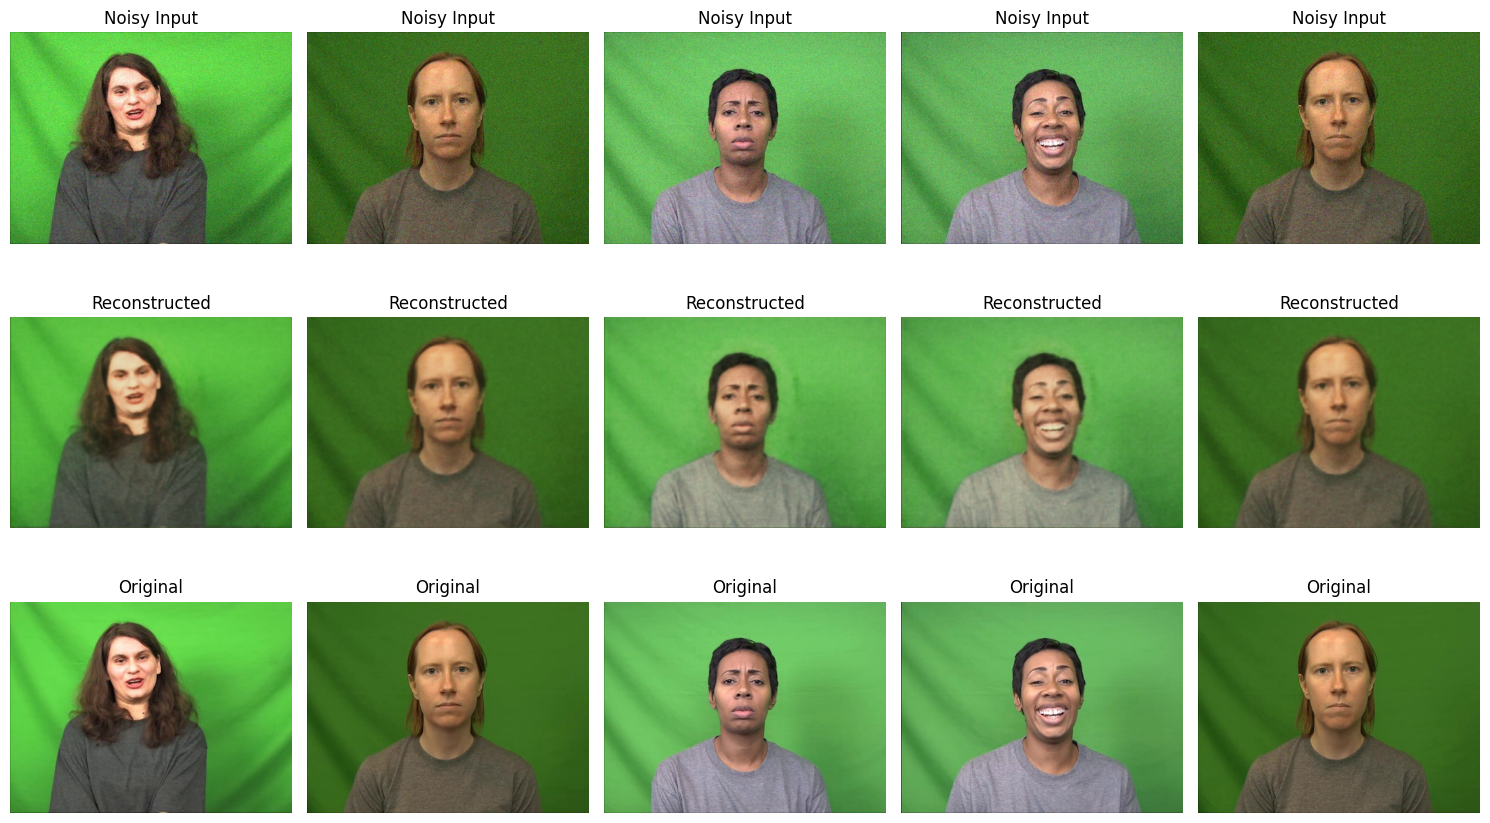

✅ Evaluation complete — visual and quantitative results displayed.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# =========================================
# EVALUATION FUNCTION
# =========================================
def evaluate_autoencoder(model, val_gen, n_samples=64):
    """
    Evaluate autoencoder on a few validation samples.
    Computes MSE, PSNR, SSIM and displays visual comparison.
    """
    # Collect a batch of validation images
    x_noisy, x_true = next(val_gen)
    x_noisy, x_true = x_noisy[:n_samples], x_true[:n_samples]

    # Reconstruct
    x_pred = model.predict(x_noisy, verbose=0)

    # Compute metrics
    mse_vals, psnr_vals, ssim_vals = [], [], []
    for i in range(len(x_true)):
        mse_vals.append(np.mean((x_true[i] - x_pred[i]) ** 2))
        psnr_vals.append(psnr(x_true[i], x_pred[i], data_range=1.0))
        ssim_vals.append(ssim(x_true[i], x_pred[i], channel_axis=-1, data_range=1.0))

    mean_mse = np.mean(mse_vals)
    mean_psnr = np.mean(psnr_vals)
    mean_ssim = np.mean(ssim_vals)

    print("\n📊 Evaluation Results (on", len(x_true), "samples):")
    print(f" - Mean MSE   : {mean_mse:.6f}")
    print(f" - Mean PSNR  : {mean_psnr:.2f} dB")
    print(f" - Mean SSIM  : {mean_ssim:.4f}")

    # =========================================
    # VISUAL COMPARISON
    # =========================================
    n_display = min(5, n_samples)
    plt.figure(figsize=(15, 9))

    for i in range(n_display):
        # Noisy input
        plt.subplot(3, n_display, i + 1)
        plt.imshow(x_noisy[i])
        plt.title("Noisy Input")
        plt.axis("off")

        # Reconstructed
        plt.subplot(3, n_display, i + 1 + n_display)
        plt.imshow(np.clip(x_pred[i], 0, 1))
        plt.title("Reconstructed")
        plt.axis("off")

        # Original
        plt.subplot(3, n_display, i + 1 + 2 * n_display)
        plt.imshow(x_true[i])
        plt.title("Original")
        plt.axis("off")

    plt.tight_layout()
    plt.show()
    print("✅ Evaluation complete — visual and quantitative results displayed.")

# =========================================
# RUN EVALUATION
# =========================================
evaluate_autoencoder(autoencoder, val_noisy, n_samples=64)


In [6]:
import shutil

# Replace 'folder_path' with your folder name/path
folder_path = '/content/autoencoder_emotion_upgraded'

# The output ZIP file name (without .zip extension)
output_filename = '/content/my_folder_backup1'

# Create ZIP file
shutil.make_archive(output_filename, 'zip', folder_path)

print("✅ Folder zipped successfully:", output_filename + ".zip")


✅ Folder zipped successfully: /content/my_folder_backup1.zip
